In [1]:
%matplotlib notebook
import os
import numpy as np
import chaospy as cp
import pandas as pd
import seaborn as sns
import itertools
import scipy.stats as ss  
from numpy import linalg as LA
from matplotlib import pyplot as plt,cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel,WhiteKernel)

In [2]:
pltlinestyles = [ (0, (1, 5)),(0, (3, 5, 1, 5)),(0, (5, 5)),(0, ()), (0, (3, 1, 1, 1, 1, 1)), 
        (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (3, 10, 1, 10, 1, 10)),(0, (1, 10)), 
        (0, (5, 1)),  (0, (3, 1, 1, 1)),(0, (3, 5, 1, 5, 1, 5)),  (0, (1, 1))  ]*10

pltmarkers   = ['o','v','s','d','+','*']
ordinal      = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])
pltcolors    = plt.rcParams['axes.prop_cycle'].by_key()['color']
figsize      = (4*1.5,3*1.5)
pltlinewidth = 1.0
return_period= [1,5,10]
prob_fails   = [1/(p *365.25*24*3600/1000) for p in return_period]
pf1year, pf5year, pf10year = prob_fails
n_mcs = 1.0/np.array(prob_fails)*100
print(n_mcs)



[ 3155760. 15778800. 31557600.]


In [3]:
def make_circle(r,n=100):
    t = np.linspace(0, np.pi * 2.0, n)
    t = t.reshape((len(t), 1))
    x = r * np.cos(t)
    y = r * np.sin(t)
    return np.hstack((x, y))

In [4]:
MODEL_NAME      = 'linear_oscillator'
WORKING_DIR     = os.getcwd()
MODEL_DIR       = os.path.join('/Users/jinsongliu/BoxSync/MUSELab/museuq/examples', MODEL_NAME)
MODEL_DIR_FIGURE= os.path.join(MODEL_DIR,r'Figures')
MODEL_DIR_DATA  = os.path.join('/Users/jinsongliu/External/MUSE_UQ_DATA',MODEL_NAME,r'Data') 

print('WORKING_DIR: {}'.format(WORKING_DIR))
print('+-- MODEL: {}'.format(MODEL_DIR))
print('|   +-- {:<6s}: {}'.format('FIGURE',MODEL_DIR_FIGURE))
print('|   +-- {:<6s}: {}'.format('DATA',MODEL_DIR_DATA))


WORKING_DIR: /Users/jinsongliu/BoxSync/MUSELab/museuq/examples/JupyterNotebook
+-- MODEL: /Users/jinsongliu/BoxSync/MUSELab/museuq/examples/linear_oscillator
|   +-- FIGURE: /Users/jinsongliu/BoxSync/MUSELab/museuq/examples/linear_oscillator/Figures
|   +-- DATA  : /Users/jinsongliu/External/MUSE_UQ_DATA/linear_oscillator/Data


In [5]:
mu_Hs    = 0.77
sigma_Hs = 0.6565
Hs_shape = 1.503
Hs_scale = 2.691
h0       = 2.9
cdf_h0   = 0.6732524353557928
gamma    = 1.503
rho      = 2.691
zeta     = 0.6565

a1 = 1/(np.sqrt(2*np.pi)*0.6565*2.9) * np.exp(-(np.log(2.9)-0.77)**2/(2*0.6565**2))
a2 = (gamma/rho) * (2.9/rho)**(gamma-1) * np.exp(-(2.9/rho)**gamma)
print(a1)
print(a2)

0.18945993853083995
0.18941583365529419


In [6]:
# data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_QuadHem10_PCE_pred_E6R0.npy'))
# print(data_set.shape)
# data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_McRE6R6.npy'))
# print(data_set.shape)
# data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_McRE6R0_stats.npy'))
# print(data_set.shape)
# data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_QuadHem5R24_mPCE_pred_E6R9.npy'))
# print(data_set.shape)
# data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_QuadHem9R24_mPCE_pred_E6R6_y1_ecdf_P1.npy'))
# print(data_set.shape)
# data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_QuadHem9R24_mPCE_pred_E6R6_y1_ecdf_P5.npy'))
# print(data_set.shape)
# data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_QuadHem9R24_mPCE_pred_E6R6_y1_ecdf_P10.npy'))
# print(data_set.shape)
# data_set = np.load(os.path.join(MODEL_DIR_DATA, 'linear_oscillator_run_DoE1_stats.npy'))
# print(data_set.shape)
# print(data_set[0])
for i in range(5,10):
#     data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_QuadHem{:d}.npy'.format(i)))
#     print(np.around(data_set,2))
    data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_QuadHem{:d}R6_stats.npy'.format(i)))
#     print(data_set.shape)
    print(np.around(np.max(data_set[:,4,0]),2))
    data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_QuadHem{:d}_stats.npy'.format(i)))
#     print(data_set.shape)
    print(np.around(np.max(data_set[:,4,0]),2))
    
# data_set = np.load(os.path.join('/Users/jinsongliu/Google Drive File Stream/My Drive/MUSE_UQ_DATA/linear_oscillator', 'DoE_McRE6R1_stats.npy'))
# print(data_set.shape)
# print(data_set[0])
# fig = plt.figure()
# for i in range(10):
#     data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_QuadHem7_PCE_pred_E6R{:d}.npy'.format(i)))
#     print(data_set.shape)
#     print(np.max(data_set, axis=1))
#     data_set_ecdf = ECDF(data_set[0,:])
#     plt.semilogy(data_set_ecdf.x, 1-data_set_ecdf.y)

8.68
9.57
9.88
9.24
11.27
10.36
11.91
14.6
14.47
14.04


(2, 2002)


<IPython.core.display.Javascript object>


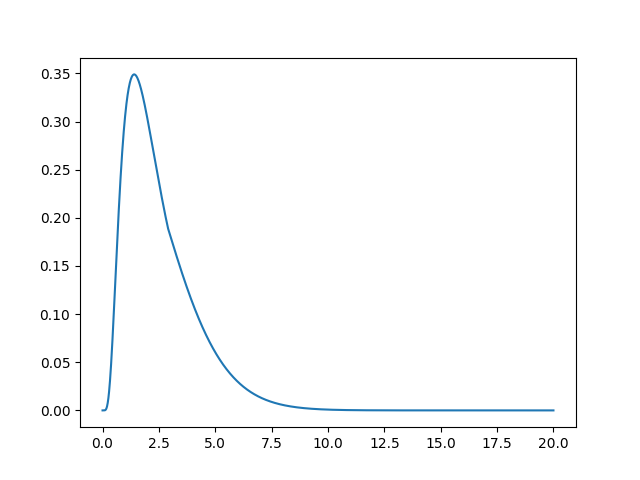

1.0017584199704654

In [5]:
data_set  = np.load('Kvitebjorn_hs.npy')
print(data_set.shape)
plt.figure()
plt.plot(data_set[0,:],data_set[1,:])
sum(data_set[1,:]*0.01)

<IPython.core.display.Javascript object>


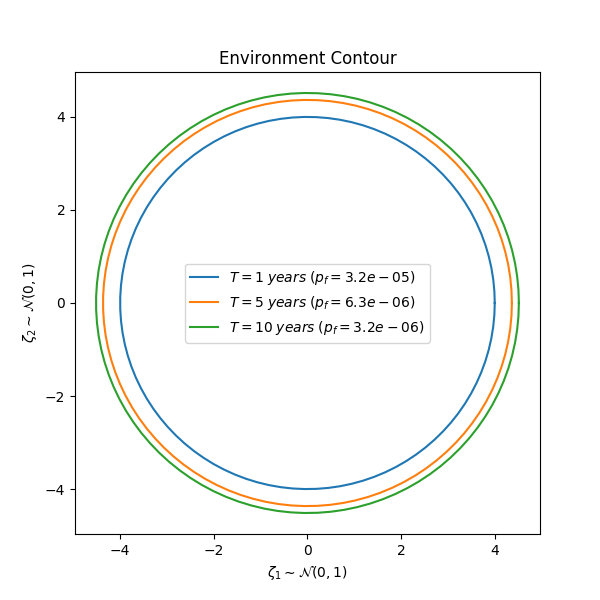

<IPython.core.display.Javascript object>


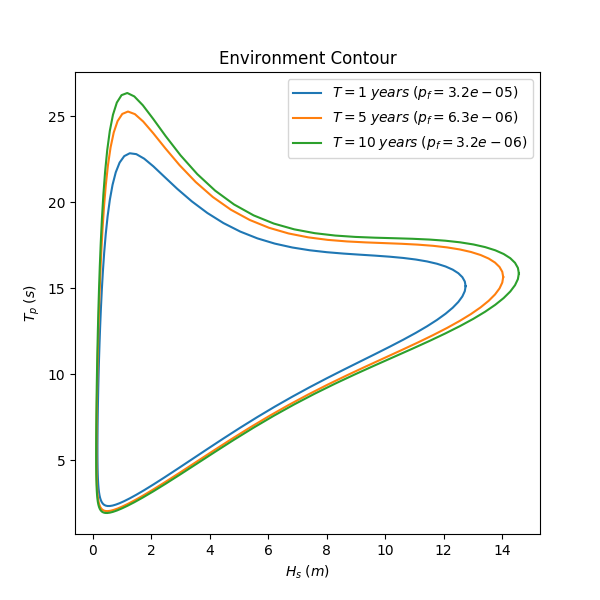

(4, 100)
(4, 100)
(4, 100)


In [16]:
fig_ec_z, axs_ec_z= plt.subplots(figsize=(4*1.5,4*1.5))
fig_ec_x, axs_ec_x= plt.subplots(figsize=(4*1.5,4*1.5))
for ipf, p in zip(prob_fails, return_period):
    data_set = np.load('Kvitebjorn_EC_P{:d}.npy'.format(p))
    print(data_set.shape)
    EC_zeta = data_set[:2,:]
    EC_x = data_set[2:,:]

    # beta = ss.norm.ppf(prob_fails)
    # print('{:<20s}:{:.4f}'.format('Reliability Index', beta))
    # EC_zeta = make_circle(beta,50)

    axs_ec_z.plot(EC_zeta[0,:],EC_zeta[1,:], label= r'$T = {:d} \;years \;(p_f = {:.1e})$'.format(p,ipf))
    axs_ec_z.set_xlabel('$\zeta_1\sim \mathcal{N}(0,1)$')
    axs_ec_z.set_ylabel('$\zeta_2\sim \mathcal{N}(0,1)$')
    axs_ec_z.set_title('Environment Contour');
    axs_ec_z.legend()

    axs_ec_x.plot(EC_x[0,:],EC_x[1,:], label= r'$T = {:d} \;years \;(p_f = {:.1e})$'.format(p,ipf))
    axs_ec_x.set_xlabel('$H_s \;(m)$')
    axs_ec_x.set_ylabel('$T_p \;(s)$')
    axs_ec_x.set_title('Environment Contour');
    axs_ec_x.legend()
    # axs_ec.set_aspect('equal', 'box')
    # axs_ec.set_aspect('equal', 'box')

    # print(EC_x.shape)
    # np.save(os.path.join(MODEL_DIR_DATA,'EC_pfe4'),EC_x)

#  Single Degree of Freedom Oscillator 
\begin{equation}
    m \ddot(x) + c \dot(x) + kx = f
\end{equation}
where,

$m = 100, c = 0.3, k = 2.25 \Rightarrow \omega_n = \sqrt{\frac{k}{m}} = 0.15Hz, \zeta = \frac{c}{2\sqrt{mk}} = 1\%$

$f$: External excitation force. Assuming Gaussian wave from JONSWAP($H_s, T_p$)

$(H_s, T_p) := \boldsymbol{X} \overset{i.i.d}{\sim} $

$(\zeta_1, \zeta_2) := \boldsymbol{\zeta} \overset{i.i.d}{\sim} \mathcal{N}(0,1)$


In [25]:
zeta    = 0.01
omega_n = 2 # rad/s
m       = 1 
k       = (omega_n/2/np.pi) **2 * m 
c       = zeta * 2 * np.sqrt(m * k)
mck     = (m,c,k)
print(m,c,k)

1 0.006366197723675814 0.10132118364233779


<IPython.core.display.Javascript object>


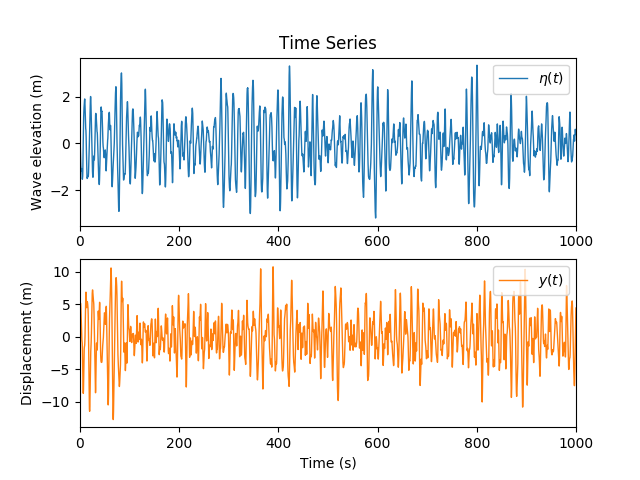

<IPython.core.display.Javascript object>


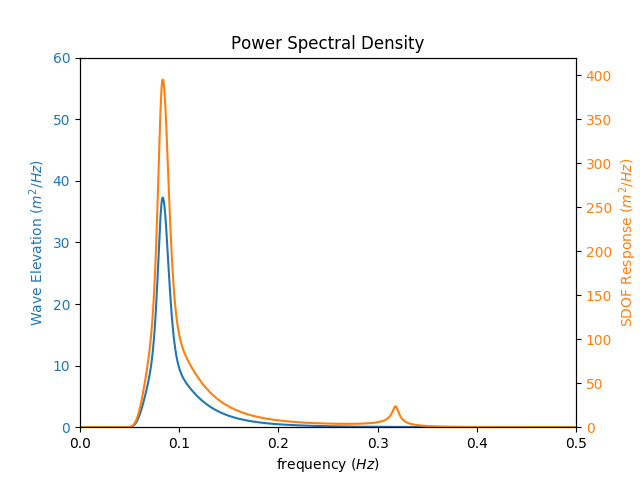

Text(0.5, 1.0, 'Power Spectral Density')

In [17]:
data_set  = np.load('test_linear_oscillator_y.npy')
sdof_time = data_set[:,:3]
sdof_freq = data_set[:,3:]
fig1, axs = plt.subplots(2,1)
axs[0].plot(sdof_time[:,0],sdof_time[:,1], label=r'$\eta(t)$',color=pltcolors[0],linewidth=pltlinewidth);
axs[1].plot(sdof_time[:,0],sdof_time[:,2], label=r'$y(t)$',color=pltcolors[1],linewidth=pltlinewidth);
axs[0].set_xlim(0,1000)
axs[0].set_ylabel('Wave elevation (m)')
axs[0].set_title('Time Series')
axs[0].legend(loc=1)

axs[1].set_xlim(0,1000)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Displacement (m)')
axs[1].legend(loc=1)


fig2, ax2 = plt.subplots()
ax2.plot(sdof_freq[:,0],sdof_freq[:,1],color=pltcolors[0]);
ax2.set_ylabel('Wave Elevation $(m^2/Hz)$',color=pltcolors[0])
ax2.tick_params(axis='y', labelcolor=pltcolors[0])
ax2.set_ylim(0,60)

ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
ax3.plot(sdof_freq[:,0],sdof_freq[:,2],color=pltcolors[1]);
ax3.set_ylabel('SDOF Response $(m^2/Hz)$',color=pltcolors[1])  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor=pltcolors[1])
ax3.set_ylim(0,420)
# ax2.tick_params(axis='y', labelcolor=color)


ax2.set_xlim(0,0.5)
ax2.set_xlabel(r'frequency ($Hz$)')
ax2.set_title('Power Spectral Density')
# ax2.legend(['JONSWAP($H_s={},T_p={}$)'.format(4, 12), 'PSD($y(t)$)'])

# 1. Design of Experiment

In [33]:
ec_top_eta = []
ec_top_y   = []

for P in [1,5,10]:
    ec_in_filename = '/Users/jinsongliu/BoxSync/MUSELab/museuq/museuq/environment/Kvitebjorn_EC_P{:d}.npy'.format(P)
    data_set= np.load(ec_in_filename)
    ec_x    = data_set[2:,:]
    print(ec_x.shape)
    ec_out_filename = 'Kvitebjorn_EC2D_P{:d}_N25_y.npy'.format(P)
    ec_data = np.squeeze(np.load(os.path.join(MODEL_DIR_DATA, ec_out_filename)))
    print(ec_data.shape)
    ec_eta  = np.squeeze(ec_data[:,:,4,0])  # 4: absmax, 0: eta
    ec_y    = np.squeeze(ec_data[:,:,4,1])  # 4: absmax, 1: y
    ec_eta_median = np.median(ec_eta,axis=0)
    ec_y_median   = np.median(ec_y,axis=0)
    
    sorted_idx = np.argsort(-ec_eta_median) # descending
    print(sorted_idx.shape)
    ec_top_eta.append(np.vstack((ec_x[:,sorted_idx], ec_eta_median[sorted_idx])))

    sorted_idx = np.argsort(-ec_y_median)
    ec_top_y.append(np.vstack((ec_x[:,sorted_idx], ec_y_median[sorted_idx])))
    
ec_extreme_eta = np.squeeze(np.array(ec_top_eta)[:,:,0])
ec_extreme_y   = np.squeeze(np.array(ec_top_y)[:,:,0])
print(np.array(ec_top_eta).shape)
print(ec_extreme_eta.shape)

(2, 100)
(25, 100, 6, 2)
(100,)
(2, 100)
(25, 100, 6, 2)
(100,)
(2, 100)
(25, 100, 6, 2)
(100,)
(3, 3, 100)
(3, 3)


Data set shape: (5, 25)
Train data shape
Train X   : (2, 25)
Weight    : (25,)


<IPython.core.display.Javascript object>


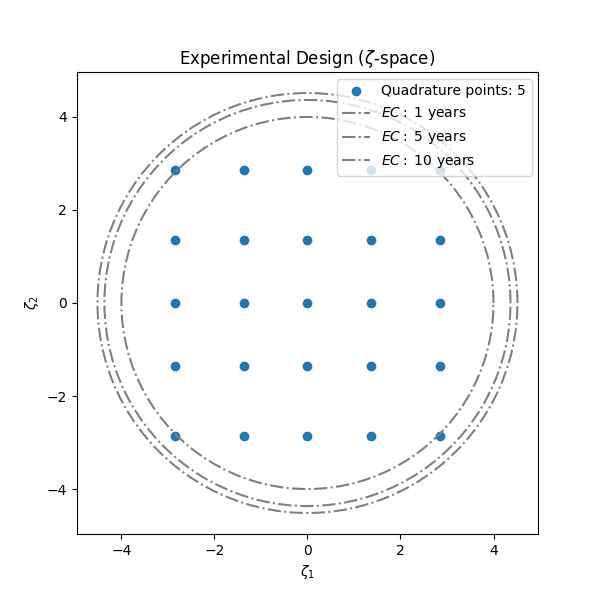

<IPython.core.display.Javascript object>


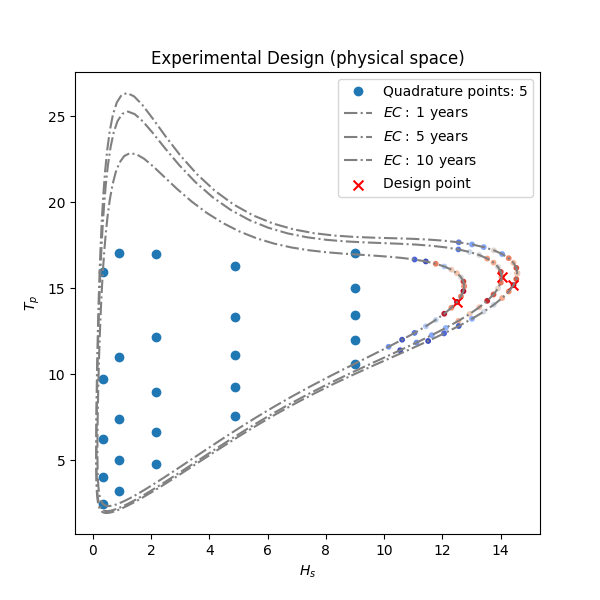

Data set shape: (5, 36)
Train data shape
Train X   : (2, 36)
Weight    : (36,)


<IPython.core.display.Javascript object>


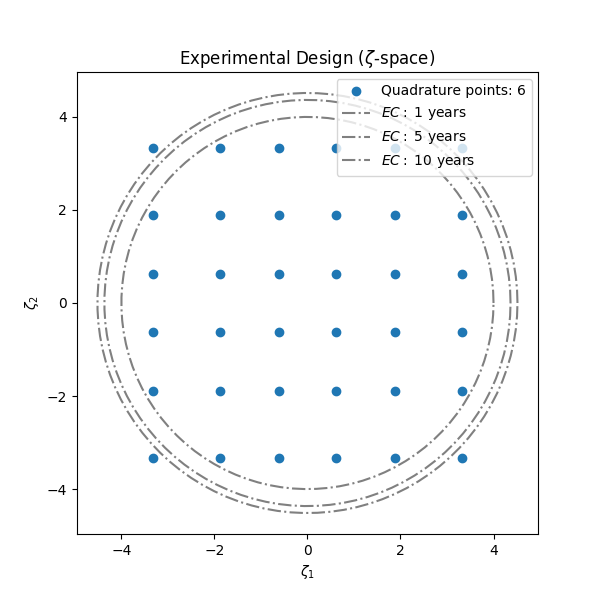

<IPython.core.display.Javascript object>


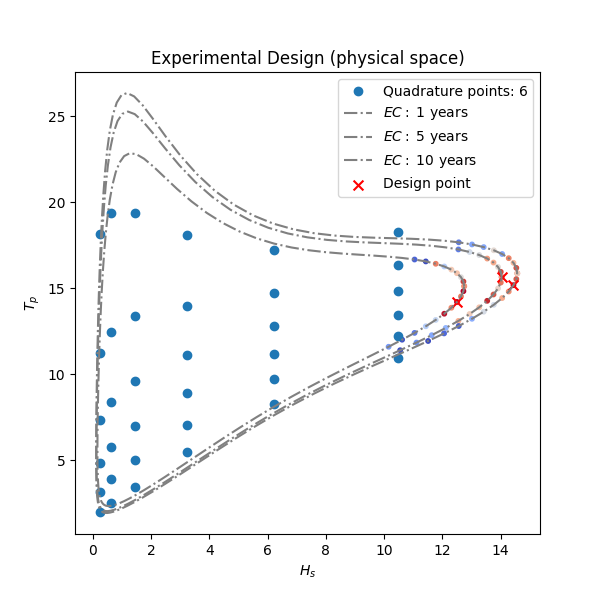

Data set shape: (5, 49)
Train data shape
Train X   : (2, 49)
Weight    : (49,)


<IPython.core.display.Javascript object>


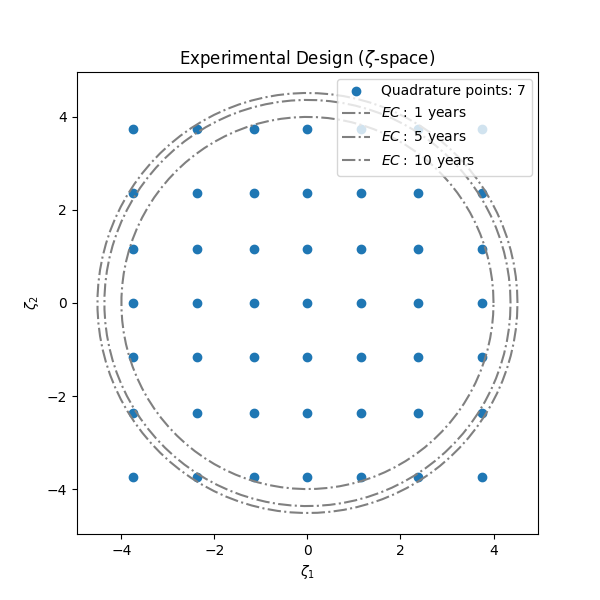

<IPython.core.display.Javascript object>


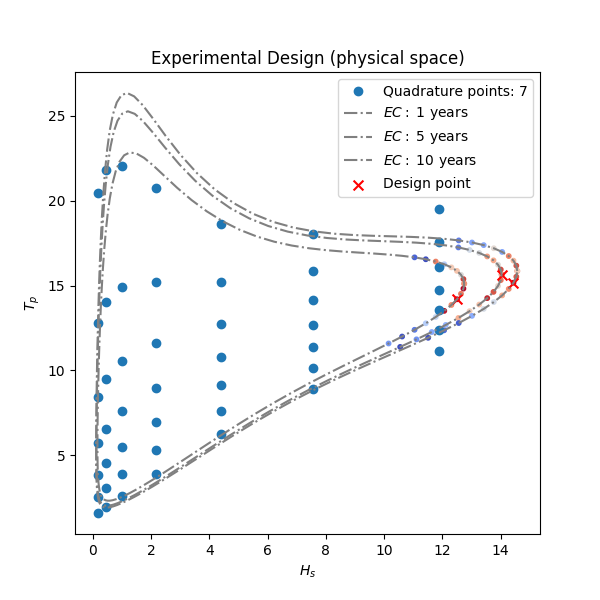

Data set shape: (5, 64)
Train data shape
Train X   : (2, 64)
Weight    : (64,)


<IPython.core.display.Javascript object>


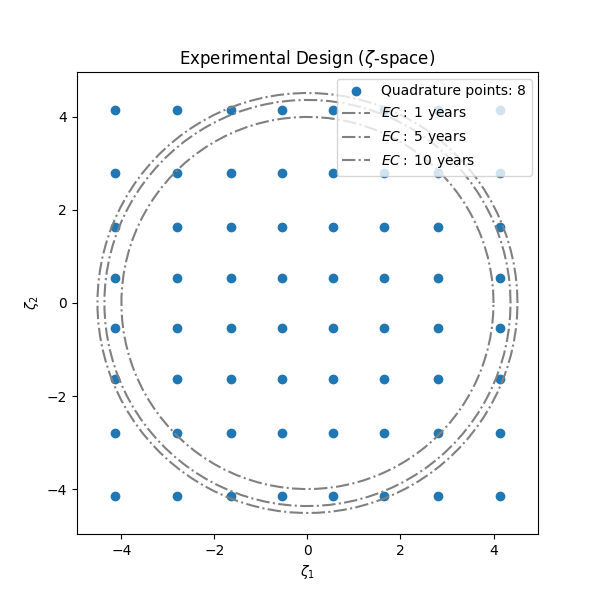

<IPython.core.display.Javascript object>


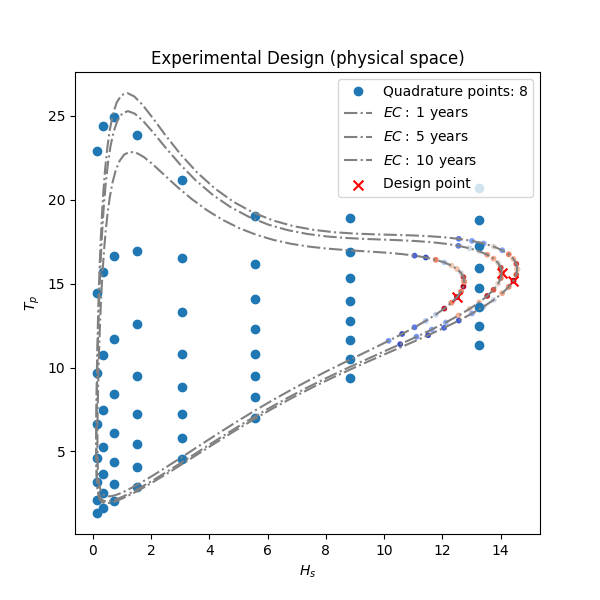

Data set shape: (5, 81)
Train data shape
Train X   : (2, 81)
Weight    : (81,)


<IPython.core.display.Javascript object>


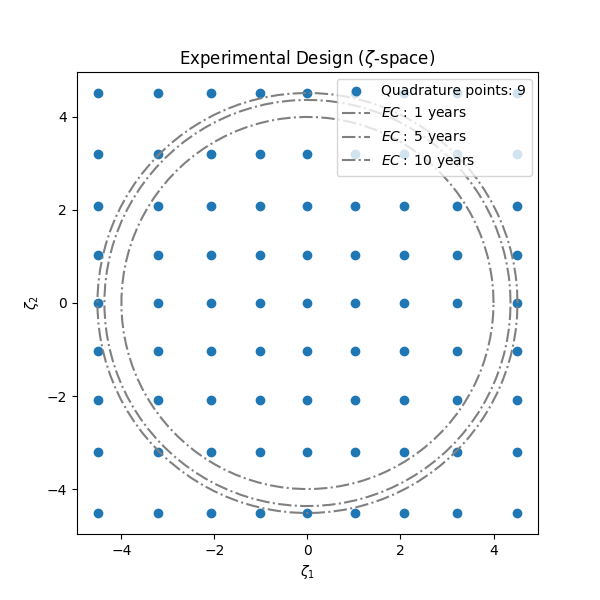

<IPython.core.display.Javascript object>


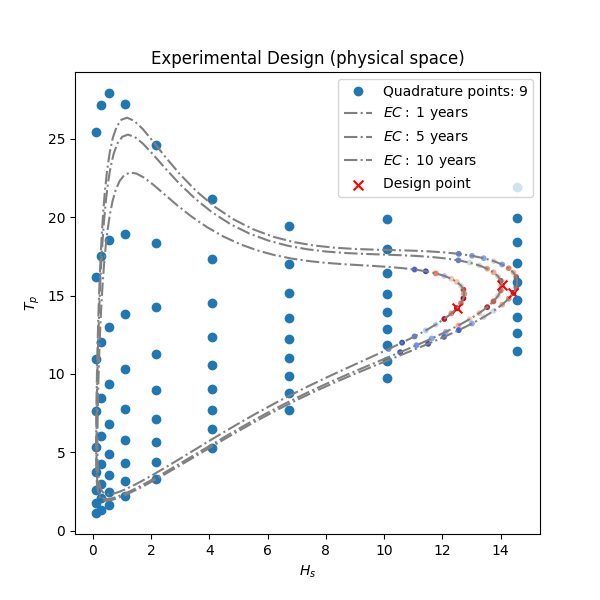

Data set shape: (5, 100)
Train data shape
Train X   : (2, 100)
Weight    : (100,)


<IPython.core.display.Javascript object>


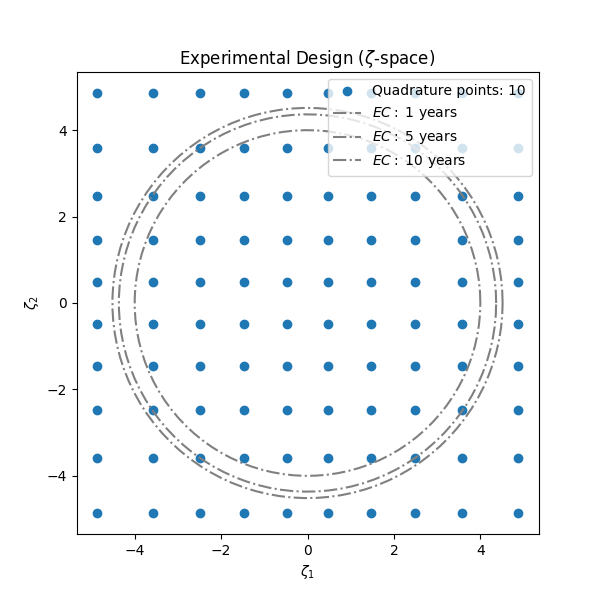

<IPython.core.display.Javascript object>


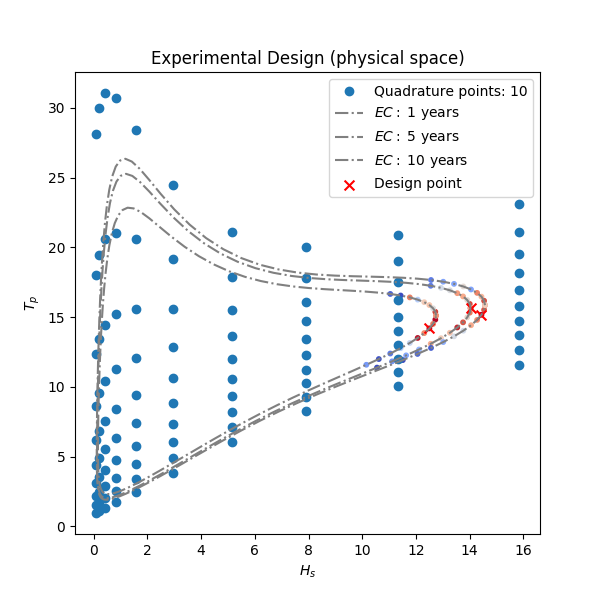

In [70]:
for idoe in np.arange(5,11):
    filename = 'DoE_QuadHem{:d}.npy'.format(idoe)
    data_set = np.load(os.path.join(MODEL_DIR_DATA,filename))
    print('Data set shape: {}'.format(data_set.shape))
    train_zeta= data_set[:2,:]
    train_w  = data_set[2,:]
    train_x  = data_set[3:5,:]
    print('{:<15s}'.format('Train data shape'))
    print('{:<10s}: {}'.format('Train X', train_x.shape))
#     print('{:<10s}: \n{}'.format('Train X', np.around(train_x.T,2)))    
#     print('{:<10s}: \n{}'.format('Train zeta', np.around(train_zeta.T,2)))
    # print('{:<15s}: {}'.format('Y', train_y.shape))
    print('{:<10s}: {}'.format('Weight', train_w.shape))

    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(train_zeta[0,:],train_zeta[1,:],'o',label='Quadrature points: {:d}'.format(idoe));
    for iT, T in enumerate([1,5,10]):
        data_set = np.load('/Users/jinsongliu/BoxSync/MUSELab/museuq/museuq/environment/Kvitebjorn_EC_P{:d}.npy'.format(T))
        EC  = data_set[:2,:]
        ax.plot(EC[0,:],EC[1,:],'-.',color='gray', label=r'$EC:$ {:d} years'.format(T))
#         iec_top_eta = ec_top_eta[iT]
#         x = np.squeeze(iec_top_eta[0,:10])
#         y = np.squeeze(iec_top_eta[1,:10])
#         z = np.squeeze(iec_top_eta[2,:10])
#         ax.scatter(x,y, c=z)
    ax.set_xlabel(r'$\zeta_1$')
    ax.set_ylabel(r'$\zeta_2$')
    ax.set_title('Experimental Design ($\zeta$-space)')
#     circle = plt.Circle((0, 0), beta, color='b',alpha=0.4)
#     ax.add_artist(p)
#     ax.add_artist(circle)
#     ax.set_xlim(-4.5,4.5)
#     ax.set_ylim(-4.5,4.5)
    ax.set_aspect('equal', 'box')
    ax.legend(loc='upper right')
    plt.savefig(os.path.join(MODEL_DIR_FIGURE,'DoE_QuadHem{:d}_zeta.pdf'.format(idoe)))
    
 
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(train_x[0,:],train_x[1,:],'o',label='Quadrature points: {:d}'.format(idoe));
    for iT, T in enumerate([1,5,10]):
        data_set = np.load('/Users/jinsongliu/BoxSync/MUSELab/museuq/museuq/environment/Kvitebjorn_EC_P{:d}.npy'.format(T))
        EC  = data_set[2:,:]
        ax.plot(EC[0,:],EC[1,:],'-.',color='gray', label=r'$EC:$ {:d} years'.format(T))
        iec_top_y = ec_top_y[iT]
        x = np.squeeze(iec_top_y[0,:20])
        y = np.squeeze(iec_top_y[1,:20])
        z = np.squeeze(iec_top_y[2,:20])
        ax.scatter(x,y, c=z,s=10,cmap='coolwarm')
        if iT==1:
            ax.scatter(x[0],y[0],s=50,marker='x',c='r',label=r'Design point')
        else:
            ax.scatter(x[0],y[0],s=50,marker='x',c='r')
    ax.set_xlabel(r'$H_s$')
    ax.set_ylabel(r'$T_p$')
    ax.set_title('Experimental Design (physical space)')
#     circle = plt.Circle((0, 0), beta, color='b',alpha=0.4)
#     ax.add_artist(p)
#     ax.add_artist(circle)
#     ax.set_xlim(-4.5,4.5)
#     ax.set_ylim(-4.5,4.5)
#     ax.set_aspect('equal', 'box')
    ax.legend(loc='upper right')
    plt.savefig(os.path.join(MODEL_DIR_FIGURE,'DoE_QuadHem{:d}_env.pdf'.format(idoe)))
    
#     fig1, ax1 = plt.subplots(figsize=(6,6))
#     ax1.plot(train_x[0,:],train_x[1,:],'o');
#     ax1.set_xlabel(r'$x_1$')
#     ax1.set_ylabel(r'$x_2$')
#     # ax1.grid()
#     ax1.set_title('Experimental Design')


# 2. Run DoE (get train data) 

train x shape: (2, 25)
train y shape: (25,)
train eta shape: (25,)
pred  eta shape: (2, 25)


<IPython.core.display.Javascript object>


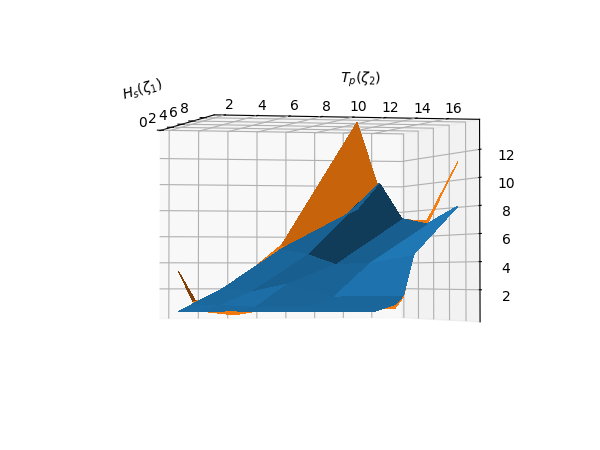

<IPython.core.display.Javascript object>


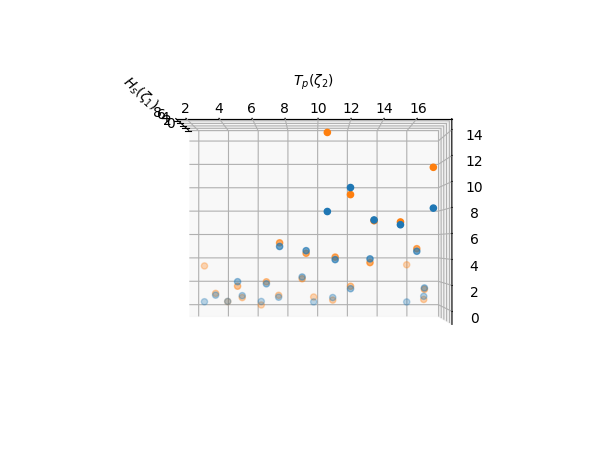

train x shape: (2, 36)
train y shape: (36,)
train eta shape: (36,)
pred  eta shape: (2, 36)


<IPython.core.display.Javascript object>


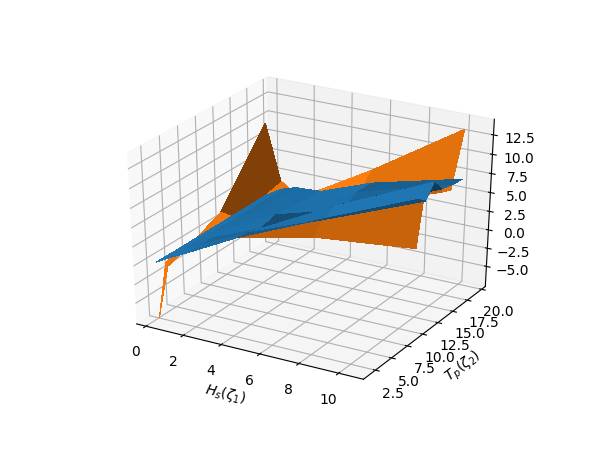

<IPython.core.display.Javascript object>


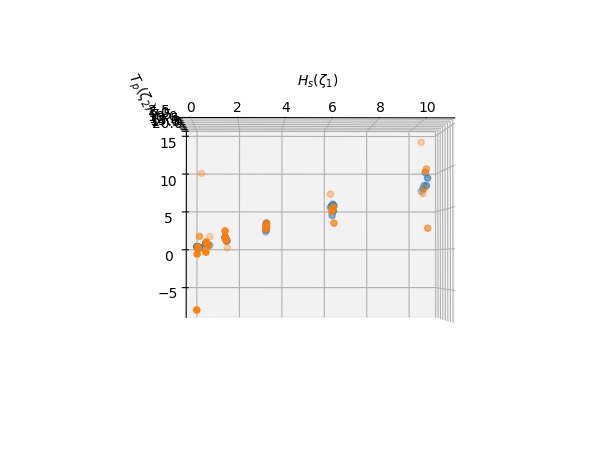

train x shape: (2, 49)
train y shape: (49,)
train eta shape: (49,)
pred  eta shape: (2, 49)


<IPython.core.display.Javascript object>


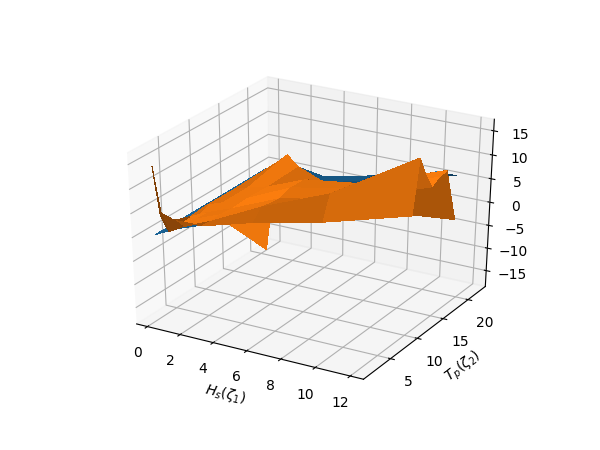

<IPython.core.display.Javascript object>


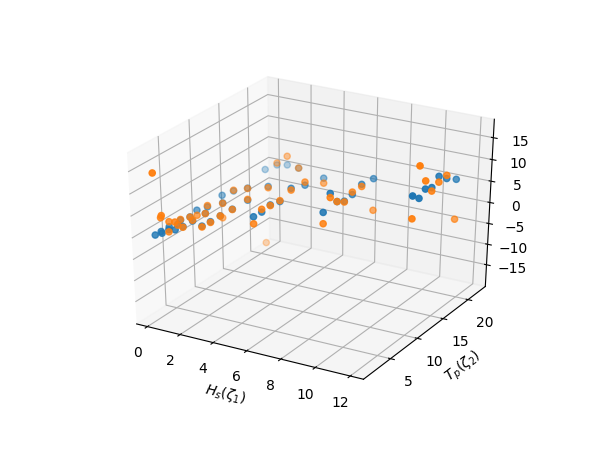

In [42]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm

for idoe in np.arange(5,8):
    filename  = 'DoE_QuadHem{:d}.npy'.format(idoe)
    data_set  = np.load(os.path.join(MODEL_DIR_DATA,filename))
    train_zeta= data_set[:2,:]
    train_w   = data_set[2,:]
    train_x   = data_set[3:5,:]
    
    filename  = 'DoE_QuadHem{:d}_stats.npy'.format(idoe)
    data_set  = np.load(os.path.join(MODEL_DIR_DATA,filename))
    train_eta = np.squeeze(data_set[:, 4, 1])#  [mean, std, skewness, kurtosis, absmax, absmin, up_crossing]
    train_y   = np.squeeze(data_set[:, 4, 2])
    filename  = 'DoE_QuadHem{:d}_valid.npy'.format(idoe)
    pred_eta  = np.load(os.path.join(MODEL_DIR_DATA,filename)).T
    print('train x shape: {}'.format(train_x.shape))
    print('train y shape: {}'.format(train_y.shape))
    print('train eta shape: {}'.format(train_eta.shape))
    print('pred  eta shape: {}'.format(pred_eta.shape))
#     print(train_zeta[0,:].reshape(5,5).T)
#     print(train_zeta[1,:].reshape(5,5).T)
    
#     fig = plt.figure(figsize=figsize)    
#     plt.scatter(train_zeta[0,:], train_y, c=train_zeta[1,:],s=50,cmap=cm.jet)
#     plt.xlabel(r'$\zeta_1(H_s)$')
#     plt.ylabel(r'Short-term Maxima')
#     plt.title(r'SDOF Response')
#     corbar = plt.colorbar()    
#     corbar.set_label(r'$\zeta_2(T_p)$')
#     plt.savefig(os.path.join(MODEL_DIR_FIGURE,'DoE_QuadHem{:d}_Yvs1.pdf'.format(idoe)))

#     fig = plt.figure(figsize=figsize)    
#     plt.scatter(train_zeta[1,:], train_y, c=train_zeta[0,:], s=50,cmap=cm.jet)
#     plt.xlabel(r'$\zeta_2(T_p)$')
#     plt.ylabel(r'Short-term Maxima')
#     plt.title(r'SDOF Response')
#     corbar = plt.colorbar()    
#     corbar.set_label(r'$\zeta_1(H_s)$') 
#     plt.savefig(os.path.join(MODEL_DIR_FIGURE,'DoE_QuadHem{:d}_Yvs2.pdf'.format(idoe)))
    
    fig = plt.figure(figsize=figsize)  
    ax  = fig.gca(projection='3d')
    x   = train_x[0,:].reshape(idoe,idoe).T
    y   = train_x[1,:].reshape(idoe,idoe).T
    z   = train_eta.reshape(idoe,idoe).T
    z0  = pred_eta[0,:].reshape(idoe,idoe).T
    surf = ax.plot_surface(x,y,z,linewidth=0, antialiased=False)
    surf = ax.plot_surface(x,y,z0,linewidth=0, antialiased=False)
    ax.set_xlabel(r'$H_s(\zeta_1)$')
    ax.set_ylabel(r'$T_p(\zeta_2)$')
    
    
    fig = plt.figure(figsize=figsize)  
    ax  = fig.gca(projection='3d')
    x   = train_x[0,:].reshape(idoe,idoe).T
    y   = train_x[1,:].reshape(idoe,idoe).T
    z   = train_eta.reshape(idoe,idoe).T
    z0  = pred_eta[0,:].reshape(idoe,idoe).T
    ax.scatter(train_x[0,:],train_x[1,:],train_eta)
    ax.scatter(train_x[0,:],train_x[1,:],pred_eta[0,:])
    ax.set_xlabel(r'$H_s(\zeta_1)$')
    ax.set_ylabel(r'$T_p(\zeta_2)$')
    
       
#     plt.scatter(train_x[0,:], train_x[1,:], c=train_y, s=50,cmap=cm.jet)
#     plt.xlabel(r'$\zeta_1(H_s)$')
#     plt.ylabel(r'$\zeta_2(T_p)$')
#     plt.title(r'SDOF Response Short-term Maxima')
#     corbar = plt.colorbar()    
#     corbar.set_label(r'Short-term Maxima')
#     plt.savefig(os.path.join(MODEL_DIR_FIGURE,'DoE_QuadHem{:d}_Yvs12.pdf'.format(idoe)))



## Exceedance plots

/Users/jinsongliu/External/MUSE_UQ_DATA/linear_oscillator/Data


<IPython.core.display.Javascript object>


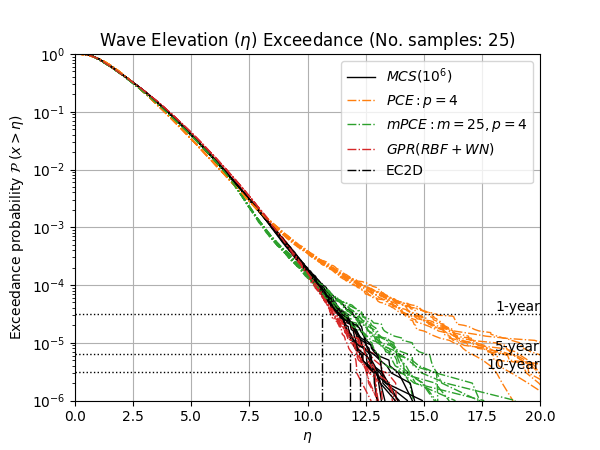

DoE_McRE6R0_stats_y0_ecdf_P1.npy
(6, 1126)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R2_stats_y0_ecdf_P1.npy
(6, 1098)
DoE_McRE6R3_stats_y0_ecdf_P1.npy
(6, 1122)
DoE_McRE6R4_stats_y0_ecdf_P1.npy
(6, 1100)
DoE_McRE6R5_stats_y0_ecdf_P1.npy
(6, 1116)
DoE_McRE6R6_stats_y0_ecdf_P1.npy
(6, 1099)
DoE_McRE6R7_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R8_stats_y0_ecdf_P1.npy
(6, 1100)
DoE_McRE6R9_stats_y0_ecdf_P1.npy
(6, 1104)


<IPython.core.display.Javascript object>


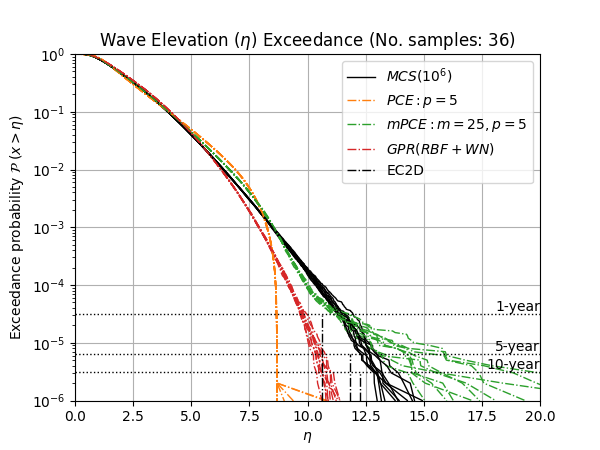

DoE_McRE6R0_stats_y0_ecdf_P1.npy
(6, 1126)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R2_stats_y0_ecdf_P1.npy
(6, 1098)
DoE_McRE6R3_stats_y0_ecdf_P1.npy
(6, 1122)
DoE_McRE6R4_stats_y0_ecdf_P1.npy
(6, 1100)
DoE_McRE6R5_stats_y0_ecdf_P1.npy
(6, 1116)
DoE_McRE6R6_stats_y0_ecdf_P1.npy
(6, 1099)
DoE_McRE6R7_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R8_stats_y0_ecdf_P1.npy
(6, 1100)
DoE_McRE6R9_stats_y0_ecdf_P1.npy
(6, 1104)


<IPython.core.display.Javascript object>


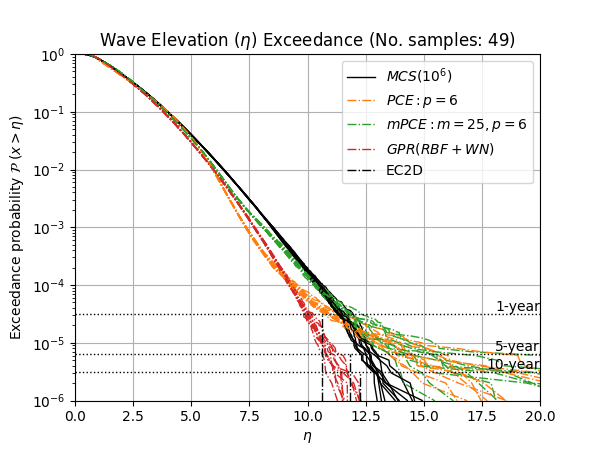

DoE_McRE6R0_stats_y0_ecdf_P1.npy
(6, 1126)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R2_stats_y0_ecdf_P1.npy
(6, 1098)
DoE_McRE6R3_stats_y0_ecdf_P1.npy
(6, 1122)
DoE_McRE6R4_stats_y0_ecdf_P1.npy
(6, 1100)
DoE_McRE6R5_stats_y0_ecdf_P1.npy
(6, 1116)
DoE_McRE6R6_stats_y0_ecdf_P1.npy
(6, 1099)
DoE_McRE6R7_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R8_stats_y0_ecdf_P1.npy
(6, 1100)
DoE_McRE6R9_stats_y0_ecdf_P1.npy
(6, 1104)


<IPython.core.display.Javascript object>


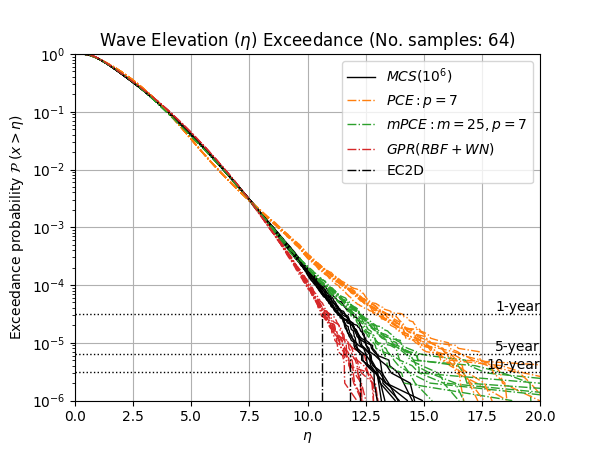

DoE_McRE6R0_stats_y0_ecdf_P1.npy
(6, 1126)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R2_stats_y0_ecdf_P1.npy
(6, 1098)
DoE_McRE6R3_stats_y0_ecdf_P1.npy
(6, 1122)
DoE_McRE6R4_stats_y0_ecdf_P1.npy
(6, 1100)
DoE_McRE6R5_stats_y0_ecdf_P1.npy
(6, 1116)
DoE_McRE6R6_stats_y0_ecdf_P1.npy
(6, 1099)
DoE_McRE6R7_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R8_stats_y0_ecdf_P1.npy
(6, 1100)
DoE_McRE6R9_stats_y0_ecdf_P1.npy
(6, 1104)


<IPython.core.display.Javascript object>


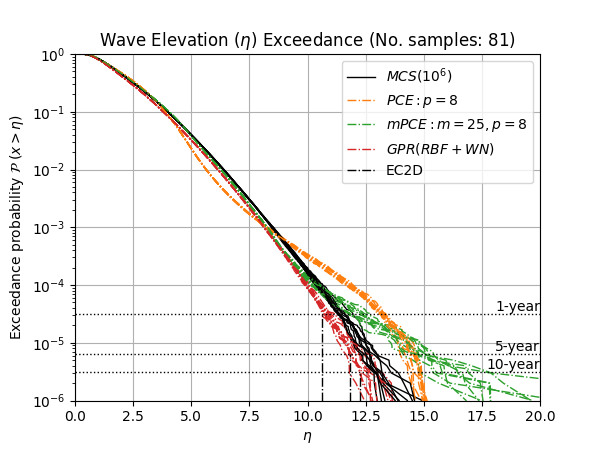

DoE_McRE6R0_stats_y0_ecdf_P1.npy
(6, 1126)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R2_stats_y0_ecdf_P1.npy
(6, 1098)
DoE_McRE6R3_stats_y0_ecdf_P1.npy
(6, 1122)
DoE_McRE6R4_stats_y0_ecdf_P1.npy
(6, 1100)
DoE_McRE6R5_stats_y0_ecdf_P1.npy
(6, 1116)
DoE_McRE6R6_stats_y0_ecdf_P1.npy
(6, 1099)
DoE_McRE6R7_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R8_stats_y0_ecdf_P1.npy
(6, 1100)
DoE_McRE6R9_stats_y0_ecdf_P1.npy
(6, 1104)


<IPython.core.display.Javascript object>


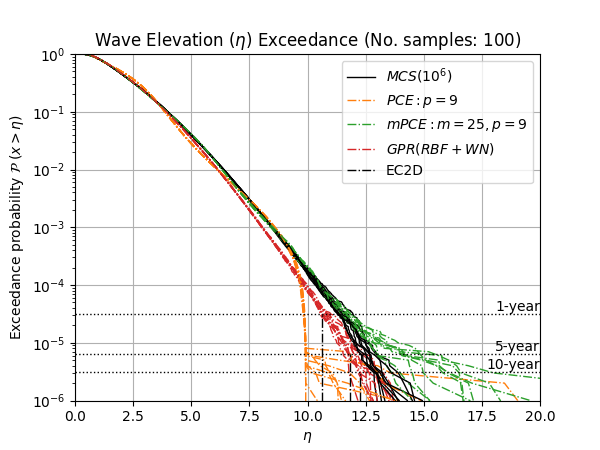

DoE_McRE6R0_stats_y0_ecdf_P1.npy
(6, 1126)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R2_stats_y0_ecdf_P1.npy
(6, 1098)
DoE_McRE6R3_stats_y0_ecdf_P1.npy
(6, 1122)
DoE_McRE6R4_stats_y0_ecdf_P1.npy
(6, 1100)
DoE_McRE6R5_stats_y0_ecdf_P1.npy
(6, 1116)
DoE_McRE6R6_stats_y0_ecdf_P1.npy
(6, 1099)
DoE_McRE6R7_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R8_stats_y0_ecdf_P1.npy
(6, 1100)
DoE_McRE6R9_stats_y0_ecdf_P1.npy
(6, 1104)


In [83]:
print(MODEL_DIR_DATA)
pf  = 1e-5
p   = 1 # return period
for quad_order in range(5,11):
#     label_added = False
    fig2        = plt.figure(figsize=figsize)
    ax2         = fig2.add_subplot(1,1,1)
    nmcs_repeat           = range(10)
    mcs_exceedance_values = [] 
    pce_exceedance_values = [] 
    gpr_exceedance_values = [] 
    for r in nmcs_repeat:

        filename = 'DoE_McRE6R{:d}_stats_y0_ecdf_P{:d}.npy'.format(r, p)
        print(filename)
        mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        print(mcs_ecdf.shape)
        filename = 'DoE_QuadHem{:d}_PCE_pred_E6R{:d}_y0_ecdf_P{:d}.npy'.format(quad_order,r, p)
        pce_mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        
        filename = 'DoE_QuadHem{:d}R24_mPCE_pred_E6R{:d}_y0_ecdf_P{:d}.npy'.format(quad_order,r, p)
        mpce_mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        
        filename = 'DoE_QuadHem{:d}_GPR_pred_E6R{:d}_y0_ecdf_P{:d}.npy'.format(quad_order,r, p)        
        gpr_mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        
        label=r'$MCS(10^6)$'
        ax2.semilogy(mcs_ecdf[0,:], 1-mcs_ecdf[-1,:],'k',linewidth=1,label=label if r==1 else '')
#         ax2.scatter(mcs_ecdf[0,:], 1-mcs_ecdf[-1,:],c = mcs_ecdf[3,:],s=10,cmap='jet')
        # PCE model emperical exceedance plot with mcs results 
        label = r'$PCE: p={:>2d}$'.format(quad_order-1)
        ax2.semilogy(pce_mcs_ecdf[0,:], 1-pce_mcs_ecdf[-1,:],'-.',color=pltcolors[1],linewidth=1,label=label if r==1 else '')
        
        label = r'$mPCE: m={:d}, p={:>2d}$'.format(25,quad_order-1)
        ax2.semilogy(mpce_mcs_ecdf[0,:], 1-mpce_mcs_ecdf[-1,:],'-.',color=pltcolors[2],linewidth=1,label=label if r==1 else '')

        label = r'$GPR(RBF+WN)$'
        ax2.semilogy(gpr_mcs_ecdf[0,:], 1-gpr_mcs_ecdf[-1,:],'-.',color=pltcolors[3],linewidth=1,label=label if r==1 else '')

            
#         mcs_exceedance_values.append(mcs_ecdf[2,0])
#         pce_exceedance_values.append(pce_mcs_ecdf[2,0])
#         gpr_exceedance_values.append(gpr_mcs_ecdf[2,0])


    ax2.set_xlim(0,20)
    ax2.set_ylim(pf/10,1)
    xmin, xmax = ax2.get_xlim()
    ymin, ymax = ax2.get_ylim()
#     ax2.plot([xmin,xmax],[pf,pf],':r',linewidth=1)
#     ax2.text(xmax,pf,r'pf={:.0e}'.format(pf),horizontalalignment='right',verticalalignment='bottom')    
#     line1 = 1/(1 *365.25*24*3600/1000)
#     line2 = 1/(5 *365.25*24*3600/1000)
#     line3 = 1/(10*365.25*24*3600/1000)
    ax2.plot([xmin,xmax],[pf1year,pf1year],':k',linewidth=1)
    ax2.text(xmax,pf1year,r'1-year',horizontalalignment='right',verticalalignment='bottom')
    ax2.plot([xmin,xmax],[pf5year,pf5year],':k',linewidth=1)
    ax2.text(xmax,pf5year,r'5-year',horizontalalignment='right',verticalalignment='bottom')
    ax2.plot([xmin,xmax],[pf10year,pf10year],':k',linewidth=1)
    ax2.text(xmax,pf10year,r'10-year',horizontalalignment='right',verticalalignment='bottom')
    ## EC results
    
    ax2.plot([ec_extreme_eta[0,-1],ec_extreme_eta[0,-1]],[ymin,pf1year],'-.k',linewidth=1,label=r'EC2D')
#     ax2.text(ec_extreme_eta[0]*0.8,line1*1.2,r'EC(1-year):{:.2f}'.format(ec_extreme_eta[0]),color='red')
    
    ax2.plot([ec_extreme_eta[1,-1],ec_extreme_eta[1,-1]],[ymin,pf5year],'-.k',linewidth=1)
#     ax2.text(ec_extreme_eta[1]*0.8,line2*1.2,r'EC(5-year):{:.2f}'.format(ec_extreme_eta[1]),color='red')
    
    ax2.plot([ec_extreme_eta[2,-1],ec_extreme_eta[2,-1]],[ymin,pf10year],'-.k',linewidth=1)
#     ax2.text(ec_extreme_eta[2]*0.8,line3*1.2,r'EC(10-year):{:.2f}'.format(ec_extreme_eta[2]),color='red')
    
    ax2.set_xlabel(r'$\eta$')
    ax2.set_ylabel(r'Exceedance probability $\mathcal{P}\;(x>\eta)$')
    ax2.set_title(r'Wave Elevation ($\eta$) Exceedance (No. samples: {:d})'.format(quad_order**2))
    plt.legend()
    plt.grid()
    # plt.show()
    plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_PCEmPCEGPR_DoE_Quadrature{:d}_eta-0.pdf'.format(quad_order)))
#     plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_mPCE_DoE_Quadrature{:d}_eta-1.pdf'.format(quad_order)))






/Users/jinsongliu/External/MUSE_UQ_DATA/linear_oscillator/Data


<IPython.core.display.Javascript object>


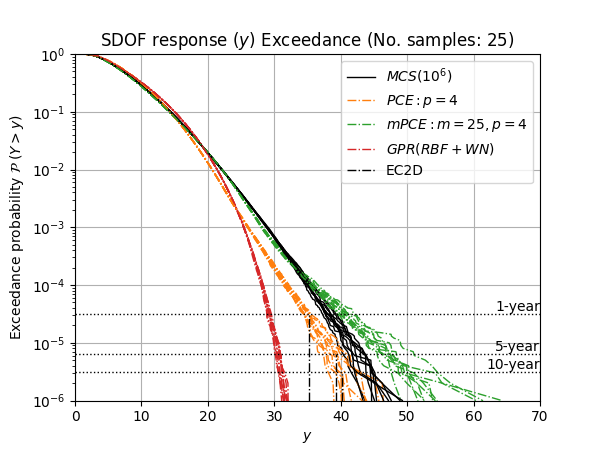

DoE_McRE6R0_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R1_stats_y1_ecdf_P1.npy
(6, 3343)
DoE_McRE6R2_stats_y1_ecdf_P1.npy
(6, 3342)
DoE_McRE6R3_stats_y1_ecdf_P1.npy
(6, 3393)
DoE_McRE6R4_stats_y1_ecdf_P1.npy
(6, 3360)
DoE_McRE6R5_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R6_stats_y1_ecdf_P1.npy
(6, 3353)
DoE_McRE6R7_stats_y1_ecdf_P1.npy
(6, 3359)
DoE_McRE6R8_stats_y1_ecdf_P1.npy
(6, 3376)
DoE_McRE6R9_stats_y1_ecdf_P1.npy
(6, 3345)


<IPython.core.display.Javascript object>


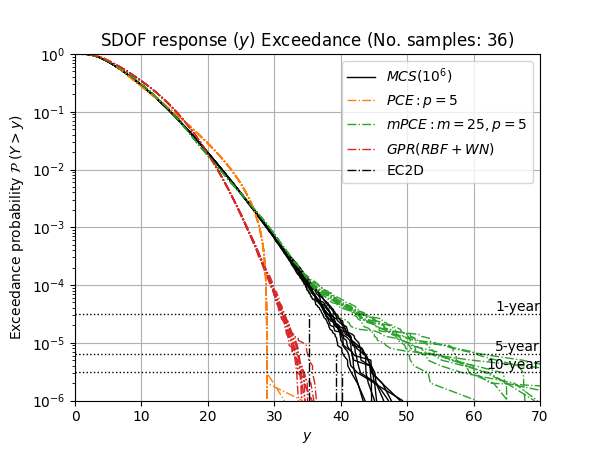

DoE_McRE6R0_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R1_stats_y1_ecdf_P1.npy
(6, 3343)
DoE_McRE6R2_stats_y1_ecdf_P1.npy
(6, 3342)
DoE_McRE6R3_stats_y1_ecdf_P1.npy
(6, 3393)
DoE_McRE6R4_stats_y1_ecdf_P1.npy
(6, 3360)
DoE_McRE6R5_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R6_stats_y1_ecdf_P1.npy
(6, 3353)
DoE_McRE6R7_stats_y1_ecdf_P1.npy
(6, 3359)
DoE_McRE6R8_stats_y1_ecdf_P1.npy
(6, 3376)
DoE_McRE6R9_stats_y1_ecdf_P1.npy
(6, 3345)


<IPython.core.display.Javascript object>


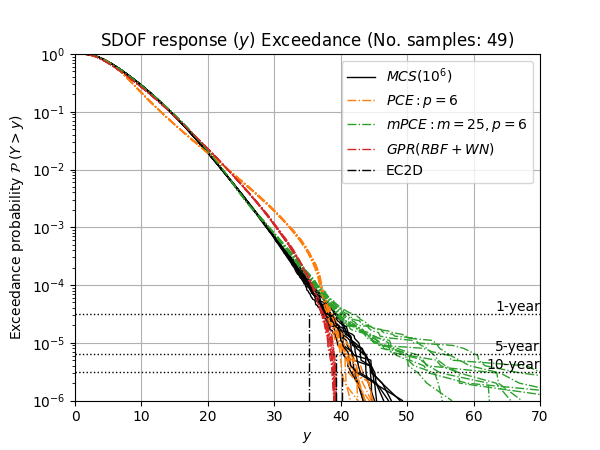

DoE_McRE6R0_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R1_stats_y1_ecdf_P1.npy
(6, 3343)
DoE_McRE6R2_stats_y1_ecdf_P1.npy
(6, 3342)
DoE_McRE6R3_stats_y1_ecdf_P1.npy
(6, 3393)
DoE_McRE6R4_stats_y1_ecdf_P1.npy
(6, 3360)
DoE_McRE6R5_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R6_stats_y1_ecdf_P1.npy
(6, 3353)
DoE_McRE6R7_stats_y1_ecdf_P1.npy
(6, 3359)
DoE_McRE6R8_stats_y1_ecdf_P1.npy
(6, 3376)
DoE_McRE6R9_stats_y1_ecdf_P1.npy
(6, 3345)


<IPython.core.display.Javascript object>


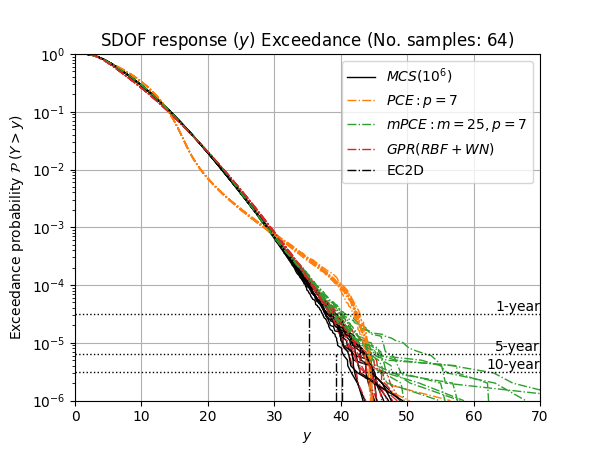

DoE_McRE6R0_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R1_stats_y1_ecdf_P1.npy
(6, 3343)
DoE_McRE6R2_stats_y1_ecdf_P1.npy
(6, 3342)
DoE_McRE6R3_stats_y1_ecdf_P1.npy
(6, 3393)
DoE_McRE6R4_stats_y1_ecdf_P1.npy
(6, 3360)
DoE_McRE6R5_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R6_stats_y1_ecdf_P1.npy
(6, 3353)
DoE_McRE6R7_stats_y1_ecdf_P1.npy
(6, 3359)
DoE_McRE6R8_stats_y1_ecdf_P1.npy
(6, 3376)
DoE_McRE6R9_stats_y1_ecdf_P1.npy
(6, 3345)


<IPython.core.display.Javascript object>


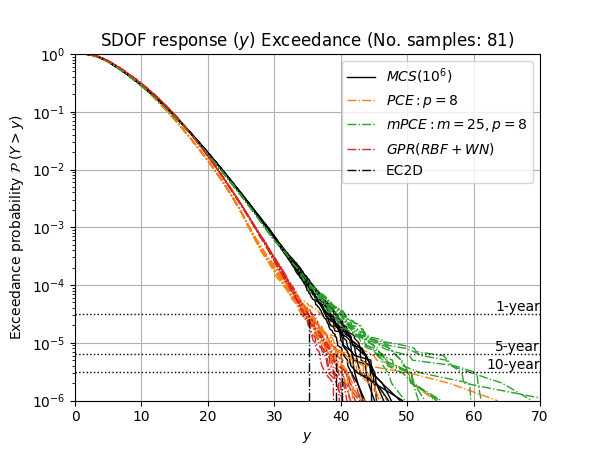

DoE_McRE6R0_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R1_stats_y1_ecdf_P1.npy
(6, 3343)
DoE_McRE6R2_stats_y1_ecdf_P1.npy
(6, 3342)
DoE_McRE6R3_stats_y1_ecdf_P1.npy
(6, 3393)
DoE_McRE6R4_stats_y1_ecdf_P1.npy
(6, 3360)
DoE_McRE6R5_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R6_stats_y1_ecdf_P1.npy
(6, 3353)
DoE_McRE6R7_stats_y1_ecdf_P1.npy
(6, 3359)
DoE_McRE6R8_stats_y1_ecdf_P1.npy
(6, 3376)
DoE_McRE6R9_stats_y1_ecdf_P1.npy
(6, 3345)


<IPython.core.display.Javascript object>


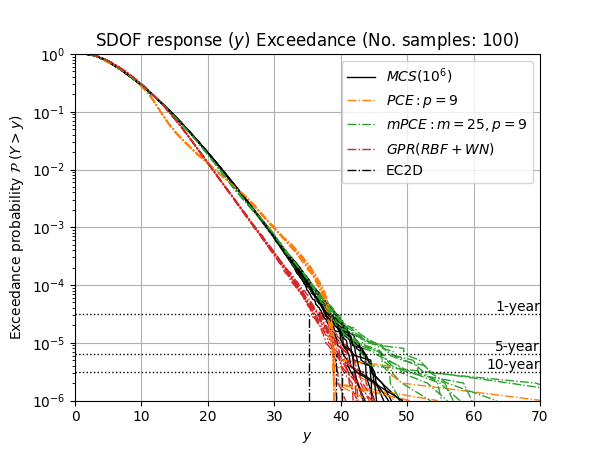

DoE_McRE6R0_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R1_stats_y1_ecdf_P1.npy
(6, 3343)
DoE_McRE6R2_stats_y1_ecdf_P1.npy
(6, 3342)
DoE_McRE6R3_stats_y1_ecdf_P1.npy
(6, 3393)
DoE_McRE6R4_stats_y1_ecdf_P1.npy
(6, 3360)
DoE_McRE6R5_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R6_stats_y1_ecdf_P1.npy
(6, 3353)
DoE_McRE6R7_stats_y1_ecdf_P1.npy
(6, 3359)
DoE_McRE6R8_stats_y1_ecdf_P1.npy
(6, 3376)
DoE_McRE6R9_stats_y1_ecdf_P1.npy
(6, 3345)


In [89]:
print(MODEL_DIR_DATA)
pf  = 1e-5
p   = 1 # return period
for quad_order in range(5,11):
#     label_added = False
    fig2        = plt.figure(figsize=figsize)
    ax2         = fig2.add_subplot(1,1,1)
    nmcs_repeat           = range(10)
    mcs_exceedance_values = [] 
    pce_exceedance_values = [] 
    gpr_exceedance_values = [] 
    for r in nmcs_repeat:

        filename = 'DoE_McRE6R{:d}_stats_y1_ecdf_P{:d}.npy'.format(r, p)
        print(filename)
        mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        print(mcs_ecdf.shape)
        filename = 'DoE_QuadHem{:d}_PCE_pred_E6R{:d}_y1_ecdf_P{:d}.npy'.format(quad_order,r, p)
        pce_mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        
        filename = 'DoE_QuadHem{:d}R24_mPCE_pred_E6R{:d}_y1_ecdf_P{:d}.npy'.format(quad_order,r, p)
        mpce_mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        
        filename = 'DoE_QuadHem{:d}_GPR_pred_E6R{:d}_y1_ecdf_P{:d}.npy'.format(quad_order,r, p)        
        gpr_mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        
        label=r'$MCS(10^6)$'
        ax2.semilogy(mcs_ecdf[0,:], 1-mcs_ecdf[-1,:],'k',linewidth=1,label=label if r==1 else '')
#         ax2.scatter(mcs_ecdf[0,:], 1-mcs_ecdf[-1,:],c = mcs_ecdf[3,:],s=10,cmap='jet')
        # PCE model emperical exceedance plot with mcs results 
        label = r'$PCE: p={:>2d}$'.format(quad_order-1)
        ax2.semilogy(pce_mcs_ecdf[0,:], 1-pce_mcs_ecdf[-1,:],'-.',color=pltcolors[1],linewidth=1,label=label if r==1 else '')
        
        label = r'$mPCE: m={:d}, p={:>2d}$'.format(25,quad_order-1)
        ax2.semilogy(mpce_mcs_ecdf[0,:], 1-mpce_mcs_ecdf[-1,:],'-.',color=pltcolors[2],linewidth=1,label=label if r==1 else '')

        label = r'$GPR(RBF+WN)$'
        ax2.semilogy(gpr_mcs_ecdf[0,:], 1-gpr_mcs_ecdf[-1,:],'-.',color=pltcolors[3],linewidth=1,label=label if r==1 else '')

            
#         mcs_exceedance_values.append(mcs_ecdf[2,0])
#         pce_exceedance_values.append(pce_mcs_ecdf[2,0])
#         gpr_exceedance_values.append(gpr_mcs_ecdf[2,0])


    ax2.set_xlim(0,70)
    ax2.set_ylim(pf/10,1)
    xmin, xmax = ax2.get_xlim()
    ymin, ymax = ax2.get_ylim()
#     ax2.plot([xmin,xmax],[pf,pf],':r',linewidth=1)
#     ax2.text(xmax,pf,r'pf={:.0e}'.format(pf),horizontalalignment='right',verticalalignment='bottom')    
#     line1 = 1/(1 *365.25*24*3600/1000)
#     line2 = 1/(5 *365.25*24*3600/1000)
#     line3 = 1/(10*365.25*24*3600/1000)
    ax2.plot([xmin,xmax],[pf1year,pf1year],':k',linewidth=1)
    ax2.text(xmax,pf1year,r'1-year',horizontalalignment='right',verticalalignment='bottom')
    ax2.plot([xmin,xmax],[pf5year,pf5year],':k',linewidth=1)
    ax2.text(xmax,pf5year,r'5-year',horizontalalignment='right',verticalalignment='bottom')
    ax2.plot([xmin,xmax],[pf10year,pf10year],':k',linewidth=1)
    ax2.text(xmax,pf10year,r'10-year',horizontalalignment='right',verticalalignment='bottom')
    ## EC results
    
    ax2.plot([ec_extreme_y[0,-1],ec_extreme_y[0,-1]],[ymin,pf1year],'-.k',linewidth=1,label=r'EC2D')
#     ax2.text(ec_extreme_eta[0]*0.8,line1*1.2,r'EC(1-year):{:.2f}'.format(ec_extreme_eta[0]),color='red')
    
    ax2.plot([ec_extreme_y[1,-1],ec_extreme_y[1,-1]],[ymin,pf5year],'-.k',linewidth=1)
#     ax2.text(ec_extreme_eta[1]*0.8,line2*1.2,r'EC(5-year):{:.2f}'.format(ec_extreme_eta[1]),color='red')
    
    ax2.plot([ec_extreme_y[2,-1],ec_extreme_y[2,-1]],[ymin,pf10year],'-.k',linewidth=1)
#     ax2.text(ec_extreme_eta[2]*0.8,line3*1.2,r'EC(10-year):{:.2f}'.format(ec_extreme_eta[2]),color='red')
    
    ax2.set_xlabel(r'$y$')
    ax2.set_ylabel(r'Exceedance probability $\mathcal{P}\;(Y>y)$')
    ax2.set_title(r'SDOF response ($y$) Exceedance (No. samples: {:d})'.format(quad_order**2))
    plt.legend()
    plt.grid()
    # plt.show()
    plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_PCEmPCEGPR_DoE_Quadrature{:d}_y-0.pdf'.format(quad_order)))
#     plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_mPCE_DoE_Quadrature{:d}_eta-1.pdf'.format(quad_order)))






/Users/jinsongliu/External/MUSE_UQ_DATA/linear_oscillator/Data


<IPython.core.display.Javascript object>


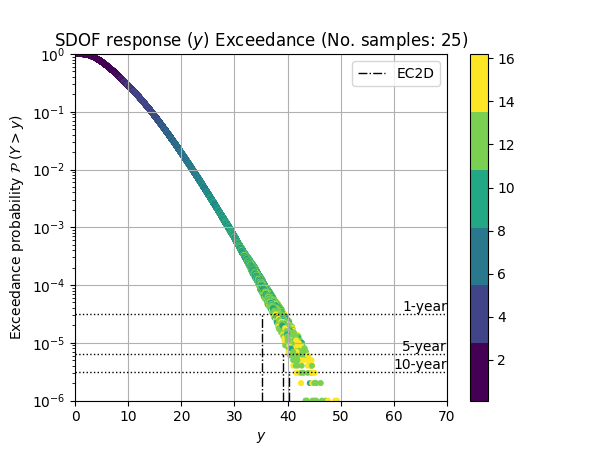

DoE_McRE6R0_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R1_stats_y1_ecdf_P1.npy
(6, 3343)
DoE_McRE6R2_stats_y1_ecdf_P1.npy
(6, 3342)
DoE_McRE6R3_stats_y1_ecdf_P1.npy
(6, 3393)
DoE_McRE6R4_stats_y1_ecdf_P1.npy
(6, 3360)
DoE_McRE6R5_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R6_stats_y1_ecdf_P1.npy
(6, 3353)
DoE_McRE6R7_stats_y1_ecdf_P1.npy
(6, 3359)
DoE_McRE6R8_stats_y1_ecdf_P1.npy
(6, 3376)
DoE_McRE6R9_stats_y1_ecdf_P1.npy
(6, 3345)


<IPython.core.display.Javascript object>


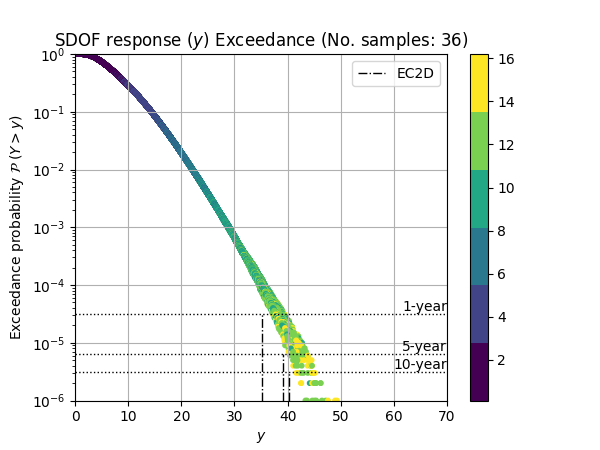

DoE_McRE6R0_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R1_stats_y1_ecdf_P1.npy
(6, 3343)
DoE_McRE6R2_stats_y1_ecdf_P1.npy
(6, 3342)
DoE_McRE6R3_stats_y1_ecdf_P1.npy
(6, 3393)
DoE_McRE6R4_stats_y1_ecdf_P1.npy
(6, 3360)
DoE_McRE6R5_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R6_stats_y1_ecdf_P1.npy
(6, 3353)
DoE_McRE6R7_stats_y1_ecdf_P1.npy
(6, 3359)
DoE_McRE6R8_stats_y1_ecdf_P1.npy
(6, 3376)
DoE_McRE6R9_stats_y1_ecdf_P1.npy
(6, 3345)


<IPython.core.display.Javascript object>


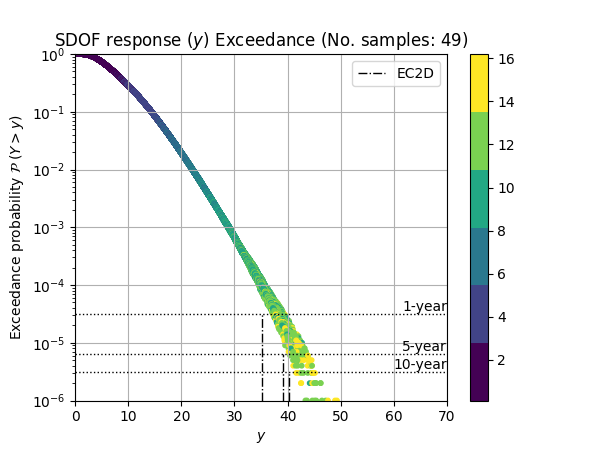

DoE_McRE6R0_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R1_stats_y1_ecdf_P1.npy
(6, 3343)
DoE_McRE6R2_stats_y1_ecdf_P1.npy
(6, 3342)
DoE_McRE6R3_stats_y1_ecdf_P1.npy
(6, 3393)
DoE_McRE6R4_stats_y1_ecdf_P1.npy
(6, 3360)
DoE_McRE6R5_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R6_stats_y1_ecdf_P1.npy
(6, 3353)
DoE_McRE6R7_stats_y1_ecdf_P1.npy
(6, 3359)
DoE_McRE6R8_stats_y1_ecdf_P1.npy
(6, 3376)
DoE_McRE6R9_stats_y1_ecdf_P1.npy
(6, 3345)


<IPython.core.display.Javascript object>


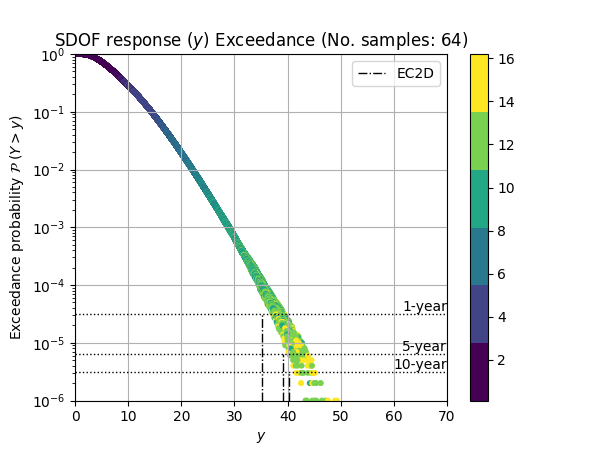

DoE_McRE6R0_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R1_stats_y1_ecdf_P1.npy
(6, 3343)
DoE_McRE6R2_stats_y1_ecdf_P1.npy
(6, 3342)
DoE_McRE6R3_stats_y1_ecdf_P1.npy
(6, 3393)
DoE_McRE6R4_stats_y1_ecdf_P1.npy
(6, 3360)
DoE_McRE6R5_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R6_stats_y1_ecdf_P1.npy
(6, 3353)
DoE_McRE6R7_stats_y1_ecdf_P1.npy
(6, 3359)
DoE_McRE6R8_stats_y1_ecdf_P1.npy
(6, 3376)
DoE_McRE6R9_stats_y1_ecdf_P1.npy
(6, 3345)


<IPython.core.display.Javascript object>


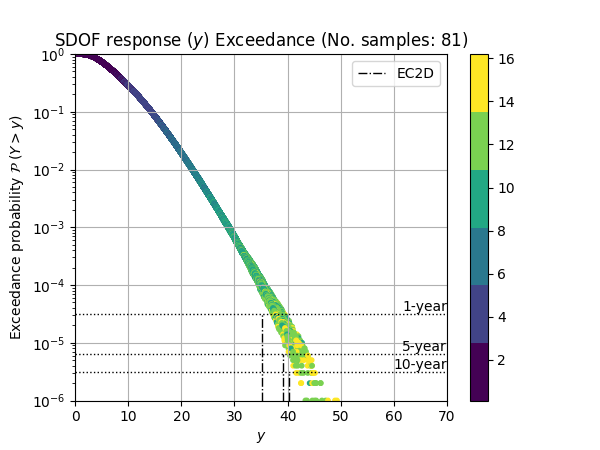

DoE_McRE6R0_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R1_stats_y1_ecdf_P1.npy
(6, 3343)
DoE_McRE6R2_stats_y1_ecdf_P1.npy
(6, 3342)
DoE_McRE6R3_stats_y1_ecdf_P1.npy
(6, 3393)
DoE_McRE6R4_stats_y1_ecdf_P1.npy
(6, 3360)
DoE_McRE6R5_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R6_stats_y1_ecdf_P1.npy
(6, 3353)
DoE_McRE6R7_stats_y1_ecdf_P1.npy
(6, 3359)
DoE_McRE6R8_stats_y1_ecdf_P1.npy
(6, 3376)
DoE_McRE6R9_stats_y1_ecdf_P1.npy
(6, 3345)


<IPython.core.display.Javascript object>


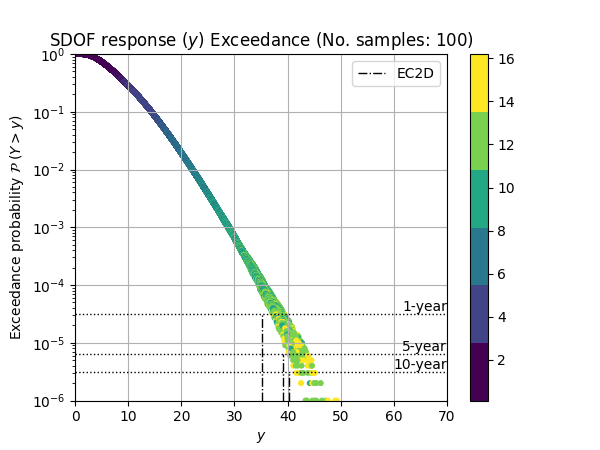

DoE_McRE6R0_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R1_stats_y1_ecdf_P1.npy
(6, 3343)
DoE_McRE6R2_stats_y1_ecdf_P1.npy
(6, 3342)
DoE_McRE6R3_stats_y1_ecdf_P1.npy
(6, 3393)
DoE_McRE6R4_stats_y1_ecdf_P1.npy
(6, 3360)
DoE_McRE6R5_stats_y1_ecdf_P1.npy
(6, 3385)
DoE_McRE6R6_stats_y1_ecdf_P1.npy
(6, 3353)
DoE_McRE6R7_stats_y1_ecdf_P1.npy
(6, 3359)
DoE_McRE6R8_stats_y1_ecdf_P1.npy
(6, 3376)
DoE_McRE6R9_stats_y1_ecdf_P1.npy
(6, 3345)


In [39]:
print(MODEL_DIR_DATA)
pf  = 1e-5
p   = 1 # return period
for quad_order in range(5,11):
#     label_added = False
    plt.figure(figsize=figsize)
#     ax2         = fig2.add_subplot(1,1,1)
    nmcs_repeat           = range(10)
    mcs_exceedance_values = [] 
    pce_exceedance_values = [] 
    gpr_exceedance_values = [] 
    for r in nmcs_repeat:

        filename = 'DoE_McRE6R{:d}_stats_y1_ecdf_P{:d}.npy'.format(r, p)
        print(filename)
        mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        print(mcs_ecdf.shape)
        filename = 'DoE_QuadHem{:d}_PCE_pred_E6R{:d}_y1_ecdf_P{:d}.npy'.format(quad_order,r, p)
        pce_mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        
        filename = 'DoE_QuadHem{:d}R24_mPCE_pred_E6R{:d}_y1_ecdf_P{:d}.npy'.format(quad_order,r, p)
        mpce_mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        
        filename = 'DoE_QuadHem{:d}_GPR_pred_E6R{:d}_y1_ecdf_P{:d}.npy'.format(quad_order,r, p)        
        gpr_mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        
        label=r'$MCS(10^6)$'
#         plt.semilogy(mcs_ecdf[0,:], 1-mcs_ecdf[-1,:],'k',linewidth=1,label=label if r==1 else '')
        plt.scatter(mcs_ecdf[0,:], 1-mcs_ecdf[-1,:],c = mcs_ecdf[3,:],s=10,cmap=plt.cm.get_cmap('viridis', 6))
        # PCE model emperical exceedance plot with mcs results 
        label = r'$PCE: p={:>2d}$'.format(quad_order-1)
#         plt.semilogy(pce_mcs_ecdf[0,:], 1-pce_mcs_ecdf[-1,:],'-.',color=pltcolors[1],linewidth=1,label=label if r==1 else '')
        
        label = r'$mPCE: m={:d}, p={:>2d}$'.format(25,quad_order-1)
#         plt.semilogy(mpce_mcs_ecdf[0,:], 1-mpce_mcs_ecdf[-1,:],'-.',color=pltcolors[2],linewidth=1,label=label if r==1 else '')

        label = r'$GPR(RBF+WN)$'
#         plt.semilogy(gpr_mcs_ecdf[0,:], 1-gpr_mcs_ecdf[-1,:],'-.',color=pltcolors[3],linewidth=1,label=label if r==1 else '')

            
#         mcs_exceedance_values.append(mcs_ecdf[2,0])
#         pce_exceedance_values.append(pce_mcs_ecdf[2,0])
#         gpr_exceedance_values.append(gpr_mcs_ecdf[2,0])

    plt.colorbar()
    plt.xlim(0,70)
    plt.ylim(pf/10,1)
    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()
#     ax2.plot([xmin,xmax],[pf,pf],':r',linewidth=1)
#     ax2.text(xmax,pf,r'pf={:.0e}'.format(pf),horizontalalignment='right',verticalalignment='bottom')    
#     line1 = 1/(1 *365.25*24*3600/1000)
#     line2 = 1/(5 *365.25*24*3600/1000)
#     line3 = 1/(10*365.25*24*3600/1000)
    plt.plot([xmin,xmax],[pf1year,pf1year],':k',linewidth=1)
    plt.text(xmax,pf1year,r'1-year',horizontalalignment='right',verticalalignment='bottom')
    plt.plot([xmin,xmax],[pf5year,pf5year],':k',linewidth=1)
    plt.text(xmax,pf5year,r'5-year',horizontalalignment='right',verticalalignment='bottom')
    plt.plot([xmin,xmax],[pf10year,pf10year],':k',linewidth=1)
    plt.text(xmax,pf10year,r'10-year',horizontalalignment='right',verticalalignment='bottom')
    ## EC results
    
    plt.plot([ec_extreme_y[0,-1],ec_extreme_y[0,-1]],[ymin,pf1year],'-.k',linewidth=1,label=r'EC2D')
#     ax2.text(ec_extreme_eta[0]*0.8,line1*1.2,r'EC(1-year):{:.2f}'.format(ec_extreme_eta[0]),color='red')
    
    plt.plot([ec_extreme_y[1,-1],ec_extreme_y[1,-1]],[ymin,pf5year],'-.k',linewidth=1)
#     ax2.text(ec_extreme_eta[1]*0.8,line2*1.2,r'EC(5-year):{:.2f}'.format(ec_extreme_eta[1]),color='red')
    
    plt.plot([ec_extreme_y[2,-1],ec_extreme_y[2,-1]],[ymin,pf10year],'-.k',linewidth=1)
#     ax2.text(ec_extreme_eta[2]*0.8,line3*1.2,r'EC(10-year):{:.2f}'.format(ec_extreme_eta[2]),color='red')
    plt.yscale('log')
    plt.xlabel(r'$y$')
    plt.ylabel(r'Exceedance probability $\mathcal{P}\;(Y>y)$')
    plt.title(r'SDOF response ($y$) Exceedance (No. samples: {:d})'.format(quad_order**2))
    plt.legend()
    plt.grid()
    # plt.show()
    plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_PCEmPCEGPR_DoE_Quadrature{:d}_y-0_scatter.pdf'.format(quad_order)))
#     plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_mPCE_DoE_Quadrature{:d}_eta-1.pdf'.format(quad_order)))






/Users/jinsongliu/External/MUSE_UQ_DATA/linear_oscillator/Data


<IPython.core.display.Javascript object>


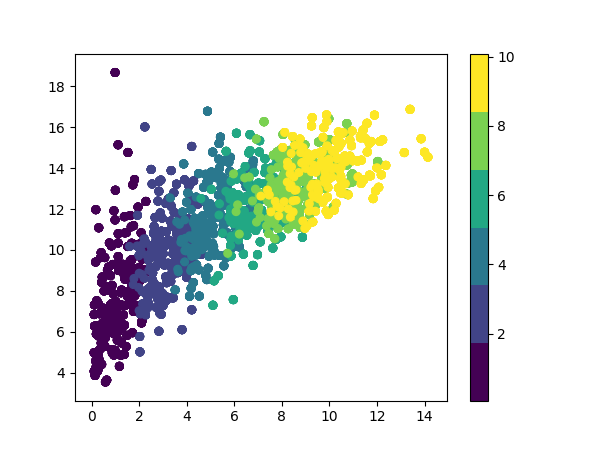

DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)
DoE_McRE6R1_stats_y0_ecdf_P1.npy
(6, 1096)


In [31]:
print(MODEL_DIR_DATA)
pf  = 1e-5
p   = 1 # return period
for quad_order in range(5,6):
#     label_added = False
    plt.figure(figsize=figsize)
#     ax2         = fig2.add_subplot(1,1,1)
    nmcs_repeat           = range(10)
    mcs_exceedance_values = [] 
    pce_exceedance_values = [] 
    gpr_exceedance_values = [] 
    for r in nmcs_repeat:
        r = 1
        filename = 'DoE_McRE6R{:d}_stats_y0_ecdf_P{:d}.npy'.format(r, p)
        print(filename)
        mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        print(mcs_ecdf.shape)
        filename = 'DoE_QuadHem{:d}_PCE_pred_E6R{:d}_y0_ecdf_P{:d}.npy'.format(quad_order,r, p)
        pce_mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        
        filename = 'DoE_QuadHem{:d}R24_mPCE_pred_E6R{:d}_y0_ecdf_P{:d}.npy'.format(quad_order,r, p)
        mpce_mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, filename))
        
#         pce_mcs_ecdf_mean = np.squeeze(np.mean(np.array(pce_mcs_ecdf), axis=0))
#         gpr_mcs_ecdf_filename = 'DoE_QuadHem{:d}_GPRx_pred_r{:d}_ecdf_pf5_eta.npy'.format(quad_order,imcs_repeat)
#         gpr_mcs_ecdf = np.load(os.path.join(MODEL_DIR_DATA, gpr_mcs_ecdf_filename)) 
        
        label=r'$MCS(10^6)$'
#         print(mcs_ecdf[:,:3])
        plt.scatter(mcs_ecdf[3,:1000], mcs_ecdf[4,:1000],c = mcs_ecdf[0,:1000],s=30,cmap=plt.cm.get_cmap('viridis', 6), marker='o')
    plt.colorbar()
        # PCE model emperical exceedance plot with mcs results 
#         label = r'$PCE: p={:>2d}$'.format(quad_order-1)
#         ax2.scatter(pce_mcs_ecdf[3,:1000], 1-pce_mcs_ecdf[4,:1000],c = pce_mcs_ecdf[0,:1000],s=30,cmap='jet', marker='d')       
#         label = r'$multi-PCE: p={:>2d}$'.format(quad_order-1)
#         ax2.scatter(mpce_mcs_ecdf[3,:1000], 1-mpce_mcs_ecdf[4,:1000],c = mpce_mcs_ecdf[0,:1000],s=30,cmap=plt.cm.get_cmap('cubehelix', 6), marker='x')
#             ax2.semilogy(gpr_mcs_ecdf[0,:], 1-gpr_mcs_ecdf[1,:],'-.',
#                          color=pltcolors[2],linewidth=1,label=r'$GPR(RBF+WN)$')
#         else:
#             ax2.semilogy(mcs_ecdf[0,:], 1-mcs_ecdf[1,:],'k')
            
# #             ax2.semilogy(pce_mcs_ecdf_mean[0,:], 1-pce_mcs_ecdf_mean[1,:],'-.',color=pltcolors[11],linewidth=1)  
#             ax2.semilogy(mpce_mcs_ecdf[0,:], 1-mpce_mcs_ecdf[1,:],'-.',color=pltcolors[1],linewidth=1)  
#             ax2.semilogy(gpr_mcs_ecdf[0,:], 1-gpr_mcs_ecdf[1,:],'-.',color=pltcolors[2],linewidth=1)  
            
#         mcs_exceedance_values.append(mcs_ecdf[2,0])
#         pce_exceedance_values.append(pce_mcs_ecdf[2,0])
#         gpr_exceedance_values.append(gpr_mcs_ecdf[2,0])
#         label_added =True
#     ax2.set_xlim(0,25)
#     ax2.set_ylim(pf/10,1)
#     xmin, xmax = ax2.get_xlim()
#     ymin, ymax = ax2.get_ylim()
#     ax2.plot([xmin,xmax],[pf,pf],':r',linewidth=1)
#     ax2.text(xmax,pf,r'pf={:.0e}'.format(pf),horizontalalignment='right',verticalalignment='bottom')    
#     line1 = 1/(1 *365.25*24*3600/1000)
#     line2 = 1/(5 *365.25*24*3600/1000)
#     line3 = 1/(10*365.25*24*3600/1000)
#     ax2.plot([xmin,xmax],[line1,line1],':k',linewidth=1)
#     ax2.text(xmax,line1*1.2,r'1-year',horizontalalignment='right')
#     ax2.plot([xmin,xmax],[line2,line2],':k',linewidth=1)
#     ax2.text(xmax,line2*1.2,r'5-year',horizontalalignment='right')
#     ax2.plot([xmin,xmax],[line3,line3],':k',linewidth=1)
#     ax2.text(xmax,line3*1.2,r'10-year',horizontalalignment='right')
#     ## EC results
#     ax2.plot([ec_extreme_eta[0],ec_extreme_eta[0]],[ymin,line1],'-.k',linewidth=1,label=r'EC')
# #     ax2.text(ec_extreme_eta[0]*0.8,line1*1.2,r'EC(1-year):{:.2f}'.format(ec_extreme_eta[0]),color='red')
    
#     ax2.plot([ec_extreme_eta[1],ec_extreme_eta[1]],[ymin,line2],'-.k',linewidth=1)
# #     ax2.text(ec_extreme_eta[1]*0.8,line2*1.2,r'EC(5-year):{:.2f}'.format(ec_extreme_eta[1]),color='red')
    
#     ax2.plot([ec_extreme_eta[2],ec_extreme_eta[2]],[ymin,line3],'-.k',linewidth=1)
# #     ax2.text(ec_extreme_eta[2]*0.8,line3*1.2,r'EC(10-year):{:.2f}'.format(ec_extreme_eta[2]),color='red')
    
#     ax2.set_xlabel(r'$\eta$')
#     ax2.set_ylabel(r'Exceedance probability $\mathcal{P}\;(x>\eta)$')
#     ax2.set_title(r'Wave Elevation ($\eta$) Exceedance (No. samples: {:d})'.format(quad_order**2))
#     plt.legend()
#     plt.grid()
#     # plt.show()
#     plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_mPCE_DoE_Quadrature{:d}_eta-0.pdf'.format(quad_order)))
#     ax2.set_xlim(0,20)
# #     ax2.set_ylim(pf,1)
#     plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_mPCE_DoE_Quadrature{:d}_eta-1.pdf'.format(quad_order)))



In [2]:
coeffs1 = np.array([ 1.84855716e+00, -1.45569927e-01,  1.10338361e+00,  9.75510134e-02,
       -2.27371593e-01,  1.29199027e-01, -1.21111529e-02, -9.52999325e-02,
       -2.15844641e-02,  4.87508176e-01,  1.56168529e-04, -1.54996694e-02,
        5.86329651e-02,  8.53756848e-04, -1.08625082e-01,  2.15131111e-02,
        1.25737212e-02, -3.53403611e-03,  2.02059289e-01,  6.46317476e-02,
       -9.51222843e-04, -2.74202321e-02,  8.97148624e-03, -5.00147725e-03,
       -6.48749355e-04,  1.09611524e-03, -2.24847711e-02,  2.33804609e-03,
        3.82586927e-03, -1.04894507e-03, -2.55274671e-02, -3.30069514e-03,
        1.62053666e-03,  5.55557893e-04,  6.41573357e-05,  8.67752552e-04])
coeffs2 = np.array([ 2.27027146e+00,  1.89309075e-02,  1.32464694e+00, -1.14068772e-02,
       -5.11171880e-03,  3.18844247e-01,  5.93824751e-03,  2.99721169e-02,
        1.05245994e-02, -4.72488658e-02, -1.03255334e-02,  1.66203644e-02,
       -3.18409491e-02,  8.28817231e-03, -7.97138732e-04, -5.68412681e-03,
       -2.07442741e-04,  1.53570916e-04, -4.30431962e-03, -4.63817402e-03,
        1.05331142e-02, -3.53403611e-03,  5.55557893e-04, -3.30069514e-03,
        3.82586927e-03, -5.00147725e-03,  1.56168529e-04,  8.97148624e-03,
       -6.48749355e-04, -1.04894507e-03,  6.41573357e-05,  8.53756848e-04,
        1.62053666e-03, -9.51222843e-04,  1.09611524e-03,  8.67752552e-04])
print(coeffs1.shape)
print(coeffs2.shape)

(36,)
(36,)


In [3]:
var_total = np.sum(coeffs2[1:]**2)
var_components = coeffs2**2/var_total
print(np.around(var_components,2))

[2.77 0.   0.94 0.   0.   0.05 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


<IPython.core.display.Javascript object>


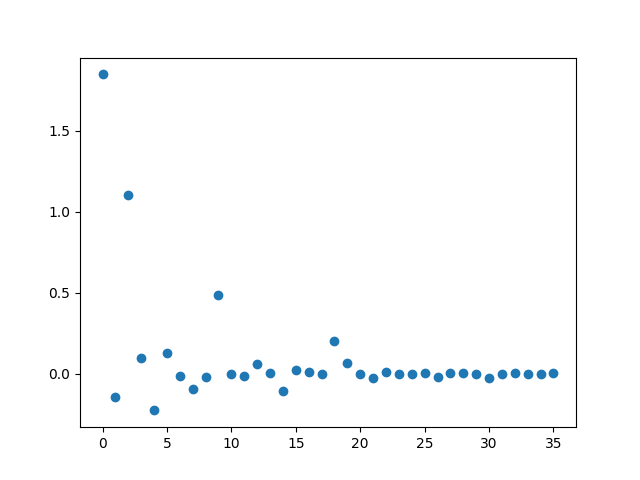

<IPython.core.display.Javascript object>


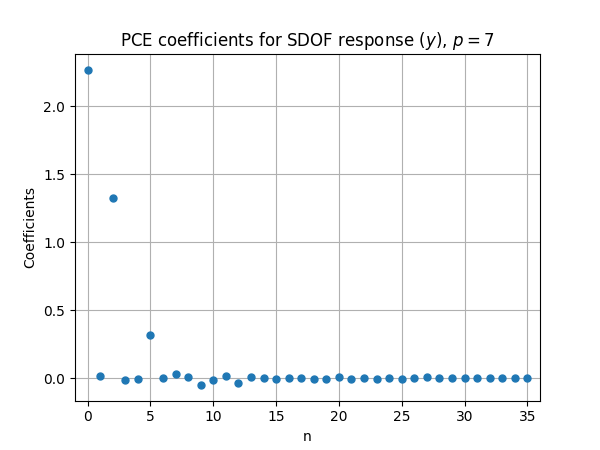

In [23]:
plt.figure()
plt.plot(coeffs1,'o')
plt.figure(figsize=figsize)
plt.plot(coeffs2,'o',markersize=5)
plt.xlim(-1,36)
plt.grid()
plt.title(r'PCE coefficients for SDOF response ($y$), $p=7$')
plt.ylabel('Coefficients')
plt.xlabel('n')
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'CoefficientsPlot_PCE_DoE_Quadrature7_y.pdf'))


# 3. Monte Carlo

<IPython.core.display.Javascript object>


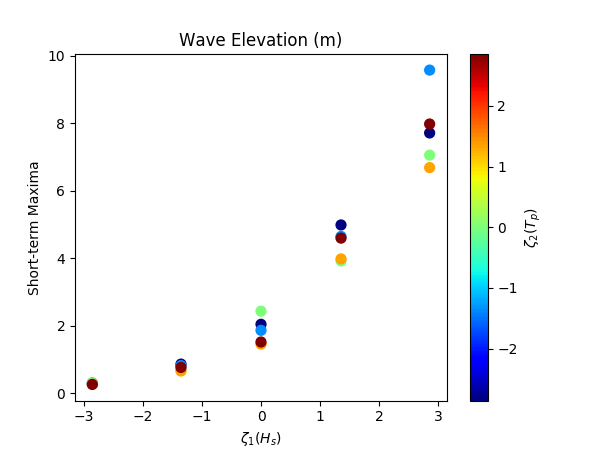

<IPython.core.display.Javascript object>


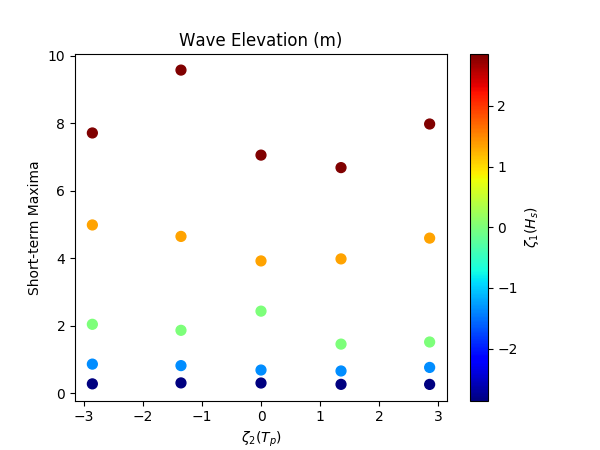

<IPython.core.display.Javascript object>


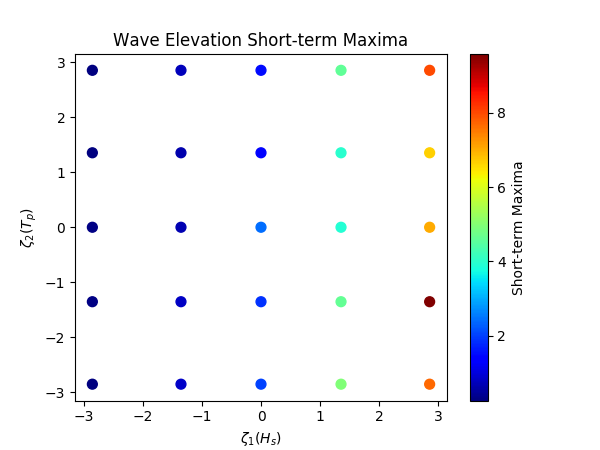

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


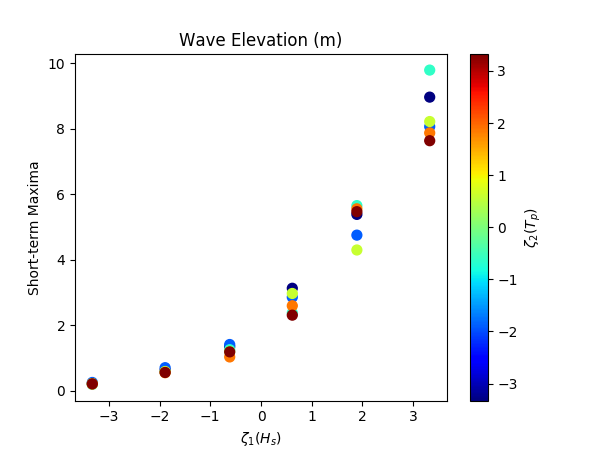

<IPython.core.display.Javascript object>


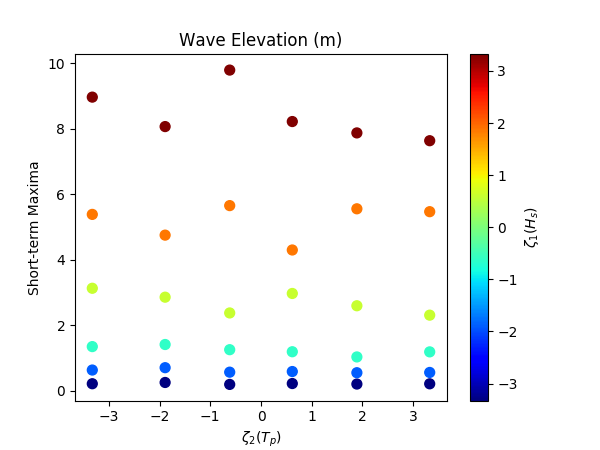

<IPython.core.display.Javascript object>


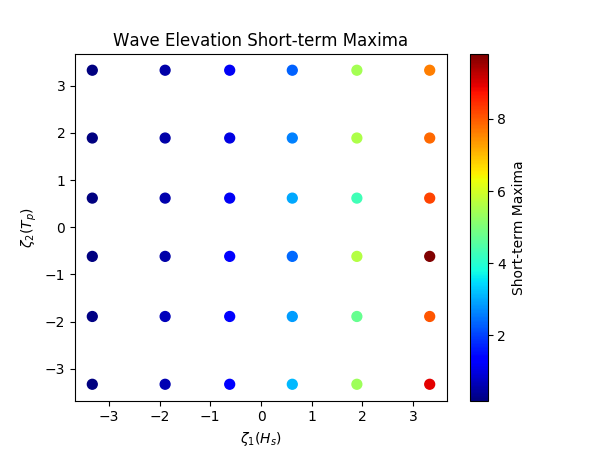

<IPython.core.display.Javascript object>


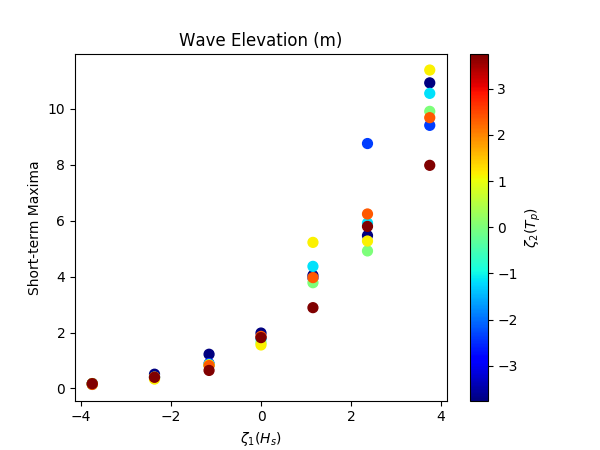

<IPython.core.display.Javascript object>


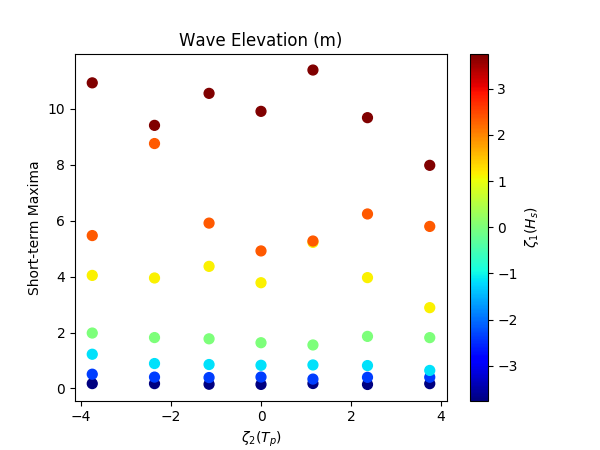

<IPython.core.display.Javascript object>


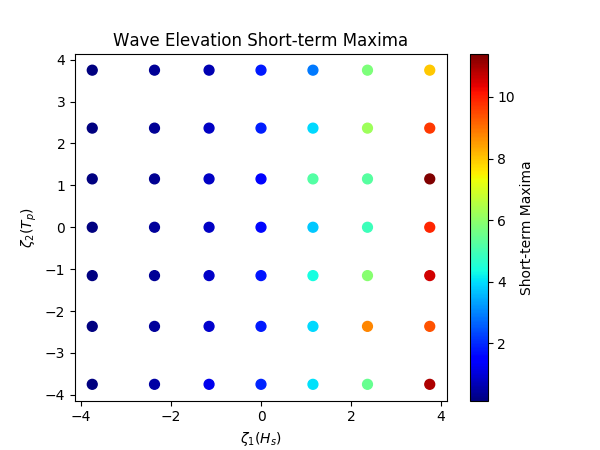

<IPython.core.display.Javascript object>


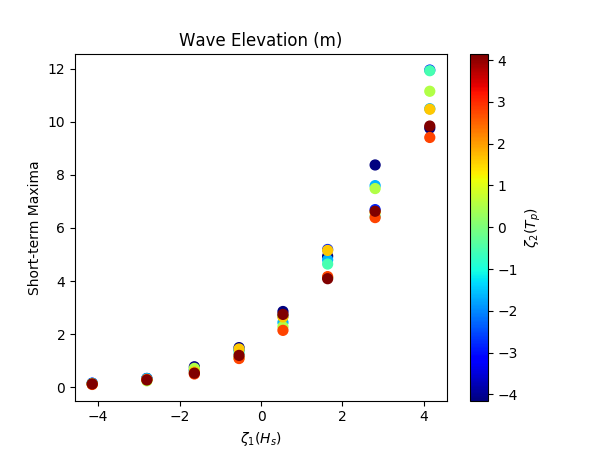

<IPython.core.display.Javascript object>


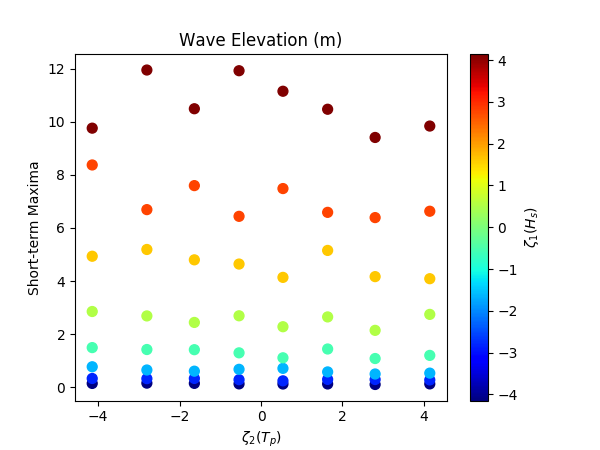

<IPython.core.display.Javascript object>


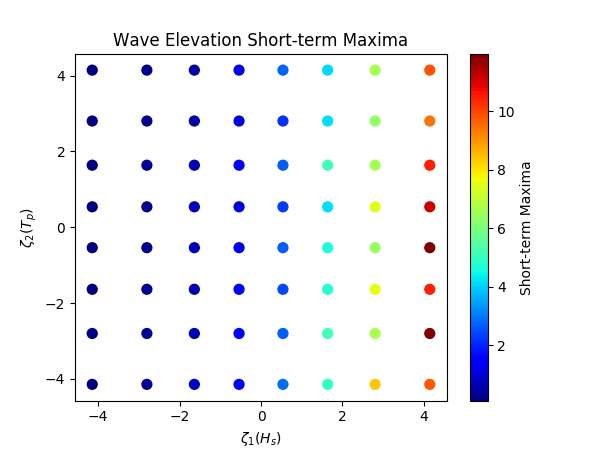

In [36]:
stats2analysis = 4  ##  [mean, std, skewness, kurtosis, absmax, absmin, up_crossing]
qoi2analysis   = 1  ## (t,eta,y,f,eta_pxx, y_pxx)
    
for idoe in np.arange(5,9):
    filename  = 'DoE_QuadHem{:d}.npy'.format(idoe)
    data_set  = np.load(os.path.join(MODEL_DIR_DATA,filename))
    train_zeta= data_set[:2,:]
    train_w   = data_set[2,:]
    train_x   = data_set[3:5,:]
    
    filename  = 'DoE_QuadHem{:d}_stats.npy'.format(idoe)
    data_set  = np.load(os.path.join(MODEL_DIR_DATA,filename))
    train_y   = np.squeeze(data_set[:, stats2analysis, qoi2analysis])
    
    fig       = plt.figure(figsize=figsize)    
    plt.scatter(train_zeta[0,:], train_y, c=train_zeta[1,:],s=50,cmap=cm.jet)
    plt.xlabel(r'$\zeta_1(H_s)$')
    plt.ylabel(r'Short-term Maxima')
    plt.title(r'Wave Elevation (m)')
    corbar = plt.colorbar()    
    corbar.set_label(r'$\zeta_2(T_p)$')
    plt.savefig(os.path.join(MODEL_DIR_FIGURE,'DoE_QuadHem{:d}_Xvs1.pdf'.format(idoe)))

    
    fig = plt.figure(figsize=figsize)    
    plt.scatter(train_zeta[1,:], train_y, c=train_zeta[0,:], s=50,cmap=cm.jet)
    plt.xlabel(r'$\zeta_2(T_p)$')
    plt.ylabel(r'Short-term Maxima')
    plt.title(r'Wave Elevation (m)')
    corbar = plt.colorbar()    
    corbar.set_label(r'$\zeta_1(H_s)$') 
    plt.savefig(os.path.join(MODEL_DIR_FIGURE,'DoE_QuadHem{:d}_Xvs2.pdf'.format(idoe)))
    
    fig = plt.figure(figsize=figsize)    
    plt.scatter(train_zeta[0,:], train_zeta[1,:], c=train_y, s=50,cmap=cm.jet)
    plt.xlabel(r'$\zeta_1(H_s)$')
    plt.ylabel(r'$\zeta_2(T_p)$')
    plt.title(r'Wave Elevation Short-term Maxima')
    corbar = plt.colorbar()    
    corbar.set_label(r'Short-term Maxima')
    plt.savefig(os.path.join(MODEL_DIR_FIGURE,'DoE_QuadHem{:d}_Xvs12.pdf'.format(idoe)))



In [24]:
hs = np.hstack((np.linspace(0,8,20)[1:],np.linspace(8,15,100)[1:]))
tp = np.hstack((np.linspace(0,15,100)[1:],np.linspace(15,30,20)[1:]))

res = []
for i in hs:
    for j in tp:
        res.append([i,j])
        
res = np.array(res).T
print(res.shape)
np.save('HsTp_grid',res)

data_set = np.load(os.path.join(MODEL_DIR_DATA, 'HsTp_grid118.npy'))
x = data_set[0,:].reshape(len(hs),len(hs))
y = data_set[1,:].reshape(len(hs),len(hs))
data_set = np.load(os.path.join(MODEL_DIR_DATA, 'HsTp_grid118_out.npy'))
data_set = np.squeeze(data_set[:,:,4,:])
print(data_set.shape)
data_set_mean = np.squeeze(np.mean(data_set, axis=0))
print(data_set_mean.shape)
z0 = data_set_mean[:,0].reshape(len(hs),len(hs))
z1 = data_set_mean[:,1].reshape(len(hs),len(hs))
fig = plt.figure(figsize=figsize)  
ax  = fig.gca(projection='3d')
surf = ax.plot_surface(x,y,z1,color='k',linewidth=0, alpha=0.5)

for idoe in np.arange(8,9):
    filename = 'DoE_QuadHem{:d}R0.npy'.format(idoe)
    data_set = np.load(os.path.join(MODEL_DIR_DATA,filename))
    train_x  = data_set[3,:]
    train_y  = data_set[4,:]
    data_set = np.load(os.path.join(MODEL_DIR_DATA, 'DoE_QuadHem{:d}_stats.npy'.format(idoe)))
    train_z  = np.squeeze(data_set[:, 4, 2])

    
    filename = 'DoE_QuadHem{:d}_GPR_grid.npy'.format(idoe)
    data_set = np.load(os.path.join(MODEL_DIR_DATA,filename))
    z        = data_set[:,1].reshape(len(hs),len(hs))
    ax.plot_surface(x,y,z,color='r',linewidth=0,alpha=0.5)
    ax.scatter(train_x,train_y,train_z)
    print(data_set.shape)
ax.set_xlabel('$H_s$')
ax.set_ylabel('$T_p$')
ax.set_zlabel('$y$')
# ax.view_init(elev=90, azim=90)
ax.set_xlim(2,12)
ax.set_zlim(5,25)
ax.set_zlim(0,40)

(2, 13924)
(30, 13924, 2)
(13924, 2)


<IPython.core.display.Javascript object>

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jinsongliu/External/MUSE_UQ_DATA/linear_oscillator/Data/DoE_QuadHem8_stats.npy'

<IPython.core.display.Javascript object>


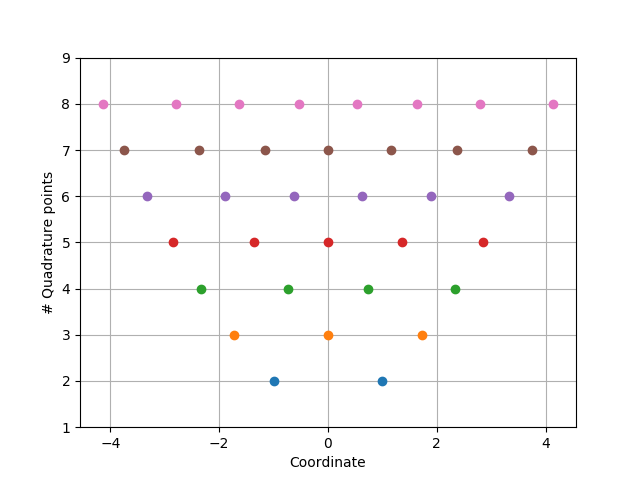

In [26]:
plt.figure()
for iorder in range(2,9):
    coord1d_e, weight1d_e = np.polynomial.hermite_e.hermegauss(iorder)
    plt.plot(coord1d_e, iorder/10*np.ones(coord1d_e.shape),'o');
locs, labels = plt.yticks()            # Get locations and labels
plt.yticks(locs, [str(int(i*10)) for i in locs]);
plt.grid()
plt.xlabel('Coordinate')
plt.ylabel('# Quadrature points')
plt.savefig('Quadrature_points.png')


<IPython.core.display.Javascript object>


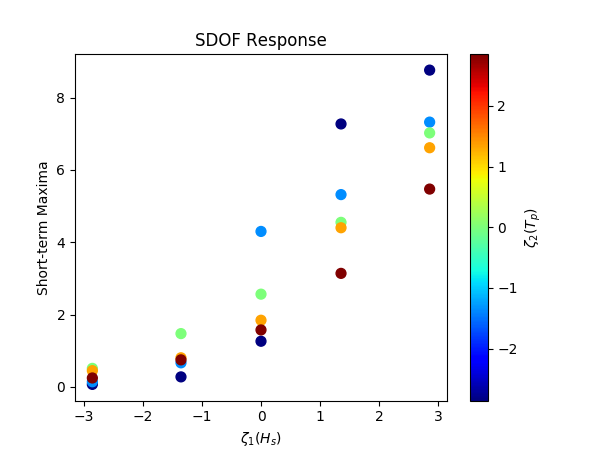

<IPython.core.display.Javascript object>


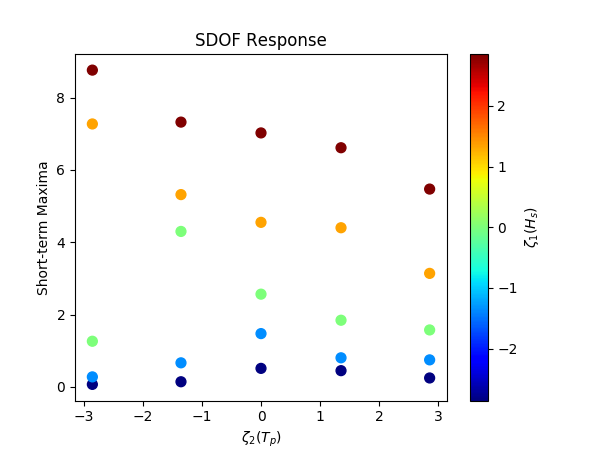

<IPython.core.display.Javascript object>


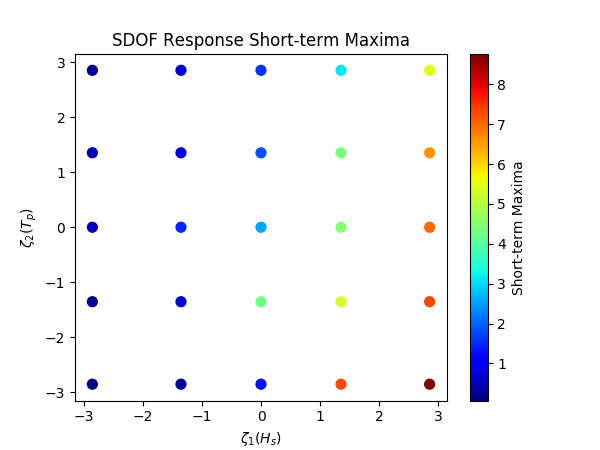

<IPython.core.display.Javascript object>


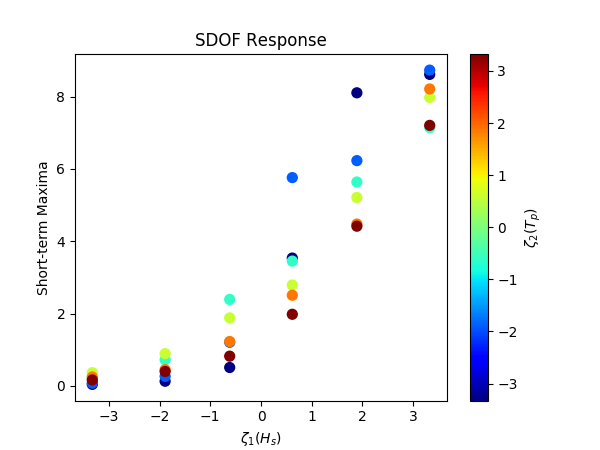

<IPython.core.display.Javascript object>


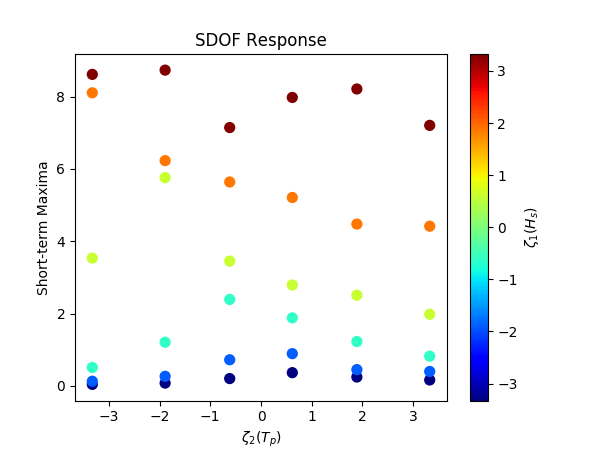

<IPython.core.display.Javascript object>


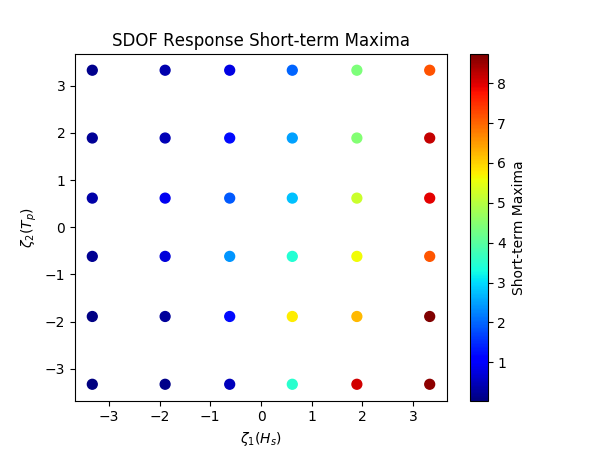

<IPython.core.display.Javascript object>


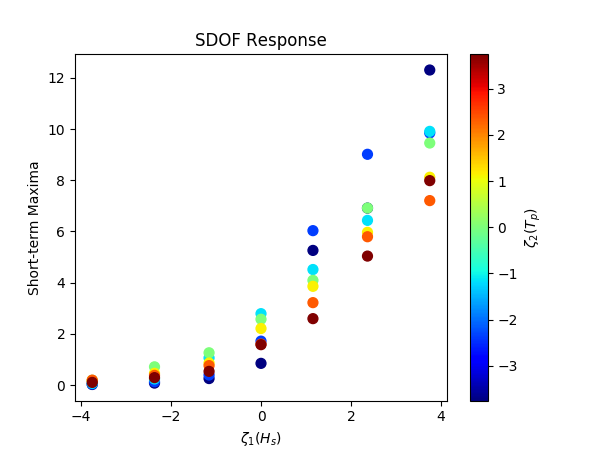

<IPython.core.display.Javascript object>


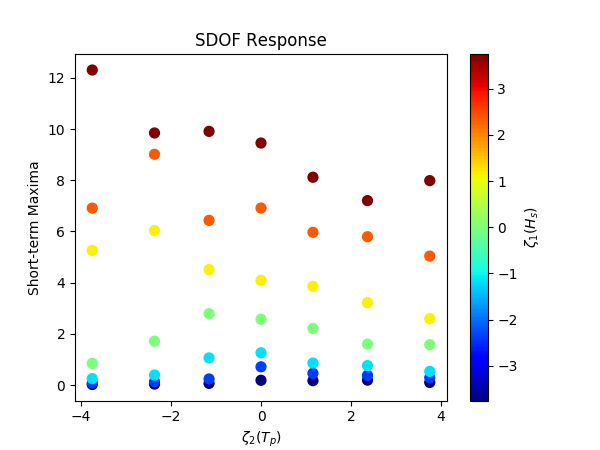

<IPython.core.display.Javascript object>


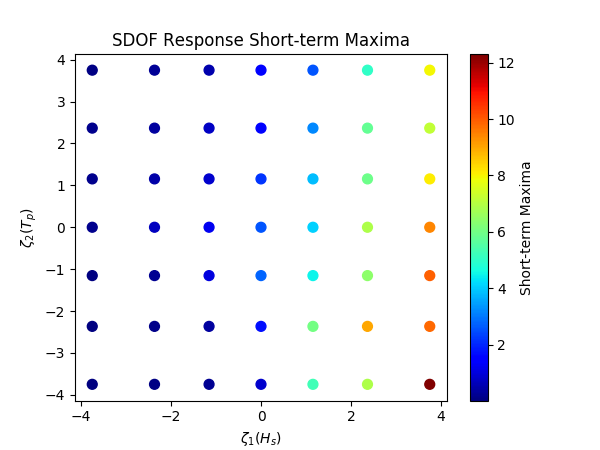

<IPython.core.display.Javascript object>


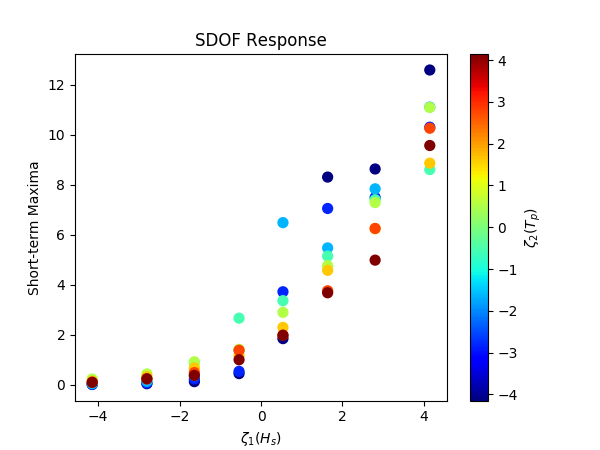

<IPython.core.display.Javascript object>


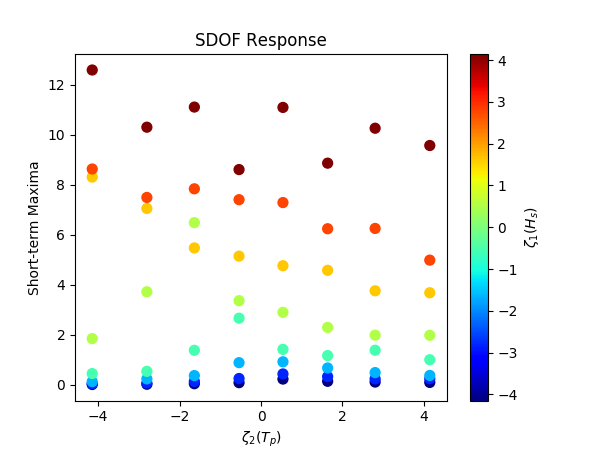

<IPython.core.display.Javascript object>


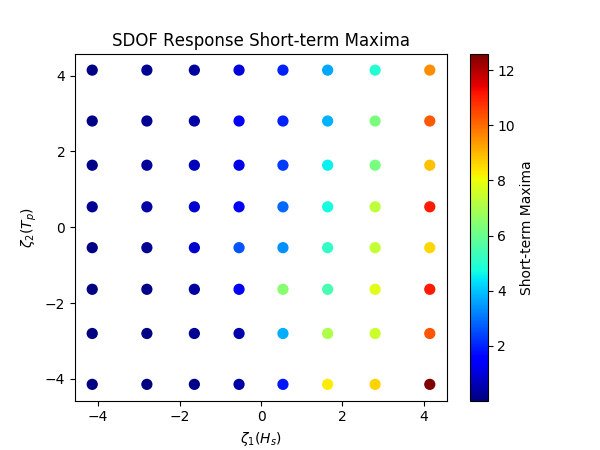

In [37]:
stats2analysis = 4 ##  [mean, std, skewness, kurtosis, absmax, absmin, up_crossing]
qoi2analysis   = 2 ## (t,eta,y,f,eta_pxx, y_pxx)
    
for idoe in np.arange(5,9):
    filename  = 'DoE_QuadHem{:d}.npy'.format(idoe)
    data_set  = np.load(os.path.join(MODEL_DIR_DATA,filename))
    train_zeta= data_set[:2,:]
    train_w   = data_set[2,:]
    train_x   = data_set[3:5,:]
    
    filename  = 'DoE_QuadHem{:d}_stats.npy'.format(idoe)
    data_set  = np.load(os.path.join(MODEL_DIR_DATA,filename))
    train_y   = np.squeeze(data_set[:, stats2analysis, qoi2analysis])
    
    fig       = plt.figure(figsize=figsize)    
    plt.scatter(train_zeta[0,:], train_y, c=train_zeta[1,:],s=50,cmap=cm.jet)
    plt.xlabel(r'$\zeta_1(H_s)$')
    plt.ylabel(r'Short-term Maxima')
    plt.title(r'SDOF Response')
    corbar = plt.colorbar()    
    corbar.set_label(r'$\zeta_2(T_p)$')
    plt.savefig(os.path.join(MODEL_DIR_FIGURE,'DoE_QuadHem{:d}_Yvs1.pdf'.format(idoe)))

    
    fig = plt.figure(figsize=figsize)    
    plt.scatter(train_zeta[1,:], train_y, c=train_zeta[0,:], s=50,cmap=cm.jet)
    plt.xlabel(r'$\zeta_2(T_p)$')
    plt.ylabel(r'Short-term Maxima')
    plt.title(r'SDOF Response')
    corbar = plt.colorbar()    
    corbar.set_label(r'$\zeta_1(H_s)$') 
    plt.savefig(os.path.join(MODEL_DIR_FIGURE,'DoE_QuadHem{:d}_Yvs2.pdf'.format(idoe)))
    
    fig = plt.figure(figsize=figsize)    
    plt.scatter(train_zeta[0,:], train_zeta[1,:], c=train_y, s=50,cmap=cm.jet)
    plt.xlabel(r'$\zeta_1(H_s)$')
    plt.ylabel(r'$\zeta_2(T_p)$')
    plt.title(r'SDOF Response Short-term Maxima')
    corbar = plt.colorbar()    
    corbar.set_label(r'Short-term Maxima')
    plt.savefig(os.path.join(MODEL_DIR_FIGURE,'DoE_QuadHem{:d}_Yvs12.pdf'.format(idoe)))



In [85]:
filename = 'DoE_McRE7R0.npy'
data_set = np.load(os.path.join(MODEL_DIR_DATA,filename))


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jinsongliu/External/MUSE_UQ_DATA/linear_oscillator/Data/DoE_McRE7R0.npy'

In [20]:
print(data_set.shape)
samples_zeta = data_set[:2,:]
samples_x = data_set[2:,:]


(4, 10000000)


<IPython.core.display.Javascript object>


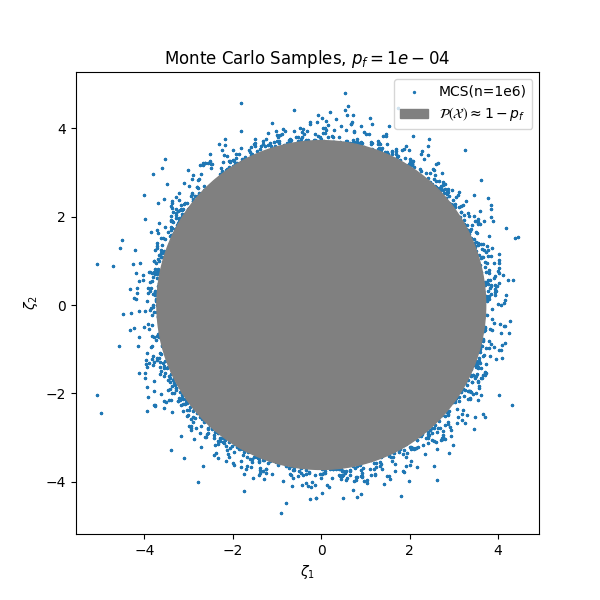

In [26]:
EC = make_circle(beta)
zeta_fig, zeta_ax = plt.subplots(figsize=(6,6))
plt_zeta_samples  = zeta_ax.scatter(x=samples_zeta[0,:1000000],y=samples_zeta[1,:1000000],s=2,zorder=0);
plt_circle        = plt.Circle((0, 0), beta, color='gray', zorder=10);
# plt_EC,           = zeta_ax.plot(EC[:,0],EC[:,1],'o',label=r'EC',color=pltcolors[1])

zeta_ax.add_artist(plt_zeta_samples)
zeta_ax.add_artist(plt_circle)
# zeta_ax.add_artist(plt_EC)

zeta_ax.set_xlabel(r'$\zeta_1$')
zeta_ax.set_ylabel(r'$\zeta_2$')
zeta_ax.set_title(r'Monte Carlo Samples, $p_f = {:.0e}$'.format(prob_fails))
zeta_ax.set_aspect('equal', 'box')
# zeta_ax.set_xlim(-np.floor(beta),np.floor(beta))
# zeta_ax.set_ylim(-np.floor(beta),np.floor(beta))
zeta_ax.legend([plt_zeta_samples,plt_circle],
               [r'MCS(n=1e6)', r'$\mathcal{P(X)}\approx 1-p_f$'],loc=1)
plt.savefig(os.path.join(MODEL_DIR_FIGURE, 'samples_zeta_joint.png'))

<IPython.core.display.Javascript object>


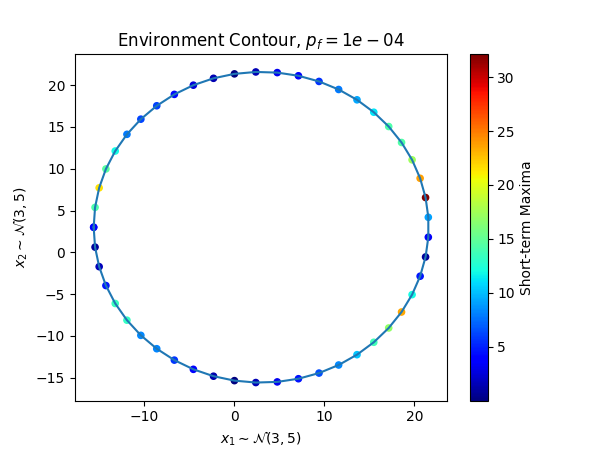

[4.40914275e+00 8.64405016e-01 1.66557676e+00 4.76604949e+00
 1.35599438e+01 1.32019447e+01 8.39015093e+00 8.19793745e+00
 5.72448988e+00 3.54283887e+00 1.28546564e+00 2.01323997e-02
 1.64637124e+00 3.25583473e+00 4.56031625e+00 6.42902271e+00
 8.36986025e+00 1.02484779e+01 1.37013782e+01 1.68604839e+01
 2.35976969e+01 1.19602118e+01 4.78424109e+00 7.76509308e-01
 3.43116680e+00 9.14420453e+00 3.21416861e+01 2.37727569e+01
 1.74101048e+01 1.43688129e+01 1.42518753e+01 1.11932094e+01
 9.38475176e+00 7.79968209e+00 5.65063069e+00 3.82681079e+00
 3.25258729e+00 1.63227750e+00 1.76441532e-02 1.52178092e+00
 2.59858948e+00 4.37818643e+00 6.10732982e+00 6.25706744e+00
 7.88222404e+00 1.20312139e+01 1.46590394e+01 2.15196150e+01
 1.42867619e+01 4.17107278e+00]


In [89]:
y_stats = np.load('test_linear_oscillator_EC_y_stats.npy')
y_st_max = np.squeeze(y_stats[:,4,2])

# fig_ec, axs_ec= plt.subplots(1,1,figsize=(4*1.5,3*1.5))
plt.figure(figsize=figsize)
plt.plot(EC_x[:,0],EC_x[:,1],'-')
plt.xlabel('$x_1\sim \mathcal{N}(3,5)$')
plt.ylabel('$x_2\sim \mathcal{N}(3,5)$')
plt.title('Environment Contour, $p_f={:.0e}$'.format(prob_fails));

plt.scatter(EC_x[:,0],EC_x[:,1], c=y_st_max, s=20,cmap=cm.jet)
# plt.aspect('equal', 'box')
corbar = plt.colorbar()    
corbar.set_label(r'Short-term Maxima')
print(y_st_max)

In [95]:
y_excd = np.squeeze(np.load('test_linear_oscillator_excd.npy'))
print(y_excd.shape)
# y_st_max = np.squeeze(y_stats[:,4,2])

# # fig_ec, axs_ec= plt.subplots(1,1,figsize=(4*1.5,3*1.5))
# plt.figure(figsize=figsize)
# plt.plot(EC_x[:,0],EC_x[:,1],'-')
# plt.xlabel('$x_1\sim \mathcal{N}(3,5)$')
# plt.ylabel('$x_2\sim \mathcal{N}(3,5)$')
# plt.title('Environment Contour, $p_f={:.0e}$'.format(prob_fails));

# plt.scatter(EC_x[:,0],EC_x[:,1], c=y_st_max, s=20,cmap=cm.jet)
# # plt.aspect('equal', 'box')
# corbar = plt.colorbar()    
# corbar.set_label(r'Short-term Maxima')
# print(y_st_max)

(3, 506)


In [ ]:
plt.savefig(os.path.join(MODEL_DIR_FIGURE, 'samples_zeta_joint.pdf'))

In [ ]:
zeta_plot = sns.jointplot(x=samples_zeta[0,:],y=samples_zeta[1,:], scatter_kws={"s": 5});
zeta_plot.savefig(os.path.join(MODEL_DIR_FIGURE, 'samples_zeta_joint.pdf'))

In [ ]:
zeta_plot.savefig(os.path.join(MODEL_DIR_FIGURE, 'samples_zeta_joint.pdf'), quality=50)